In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

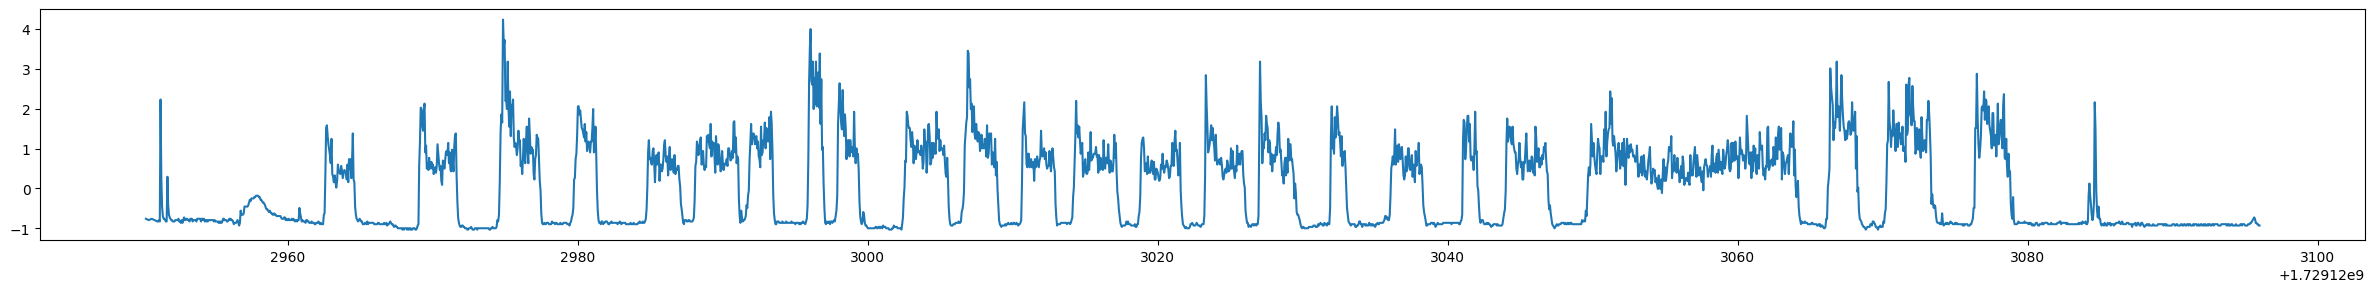

In [3]:
### Load Data
data = np.genfromtxt("lk_pressed.csv", delimiter=',')
Y = data[:,1]
X = data[:, 0]

### Normalize Data
Y = np.reshape(Y, (len(Y), 1))   # Need to reshape it to scale
scaler = StandardScaler()
scaler.fit(Y)
Y = scaler.transform(Y)

### Clean up data
running_list = []
running_list_y = []
final_x = []
final_y = []
prev = 0
total = 0
for x, y in zip(X, Y):
    # if the times are the same, then we append the vals to a running list
    if x == prev:
        running_list.append(x)
        running_list_y.append(y[0])

    # if the times are different, then we can break up the 
    # millisecond based on how many sensor readings we got
    else:
        for index, i in enumerate(running_list):
            final_x.append(min(running_list) + (index + 1) / len(running_list))
            final_y.append(running_list_y[index])
        running_list = []
        running_list_y = []
    prev = x

### Plot Data
plt.figure(figsize=(30, 3))
plt.plot(final_x, final_y)
plt.show()


In [4]:
### Create a Pandas DataFrame
orignal = pd.DataFrame({"Time": final_x[1:], "Signal": final_y[1:]})

df = orignal[orignal["Time"] > 1729122960].copy()
df["Time"] = df["Time"] - min(df["Time"])
display(df.head())
print(len(df))

Time    Signal
174  0.000000 -0.757928
175  0.052632 -0.791835
176  0.105263 -0.791835
177  0.157895 -0.791835
178  0.210526 -0.757928

2572


In [5]:
interval_times = [2.34, 2.14, 4.24, 2.72, 2.94, 2.81,
                  2.39, 1.71, 3.36, 2.39, 0.93, 2.89,
                  0.73, 1.54, 2.37, 1.14, 0.79, 1.59,
                  3.06, 3.11, 1.09, 2.29, 1.59, 2.28,
                  1.31, 3.02, 1.48, 2.84, 1.66, 2.86,
                  0.93, 2.56, 2.36, 1.18, 2.94, 2.29,
                  2.67, 1.41, 1.48, 3.11, 2.92, 14.24,
                  2.23, 1.96, 2.08, 3.12, 2.87, 2.31,
                  2.29]

            Time    Signal  State
174     0.000000 -0.757928    NaN
175     0.052632 -0.791835    NaN
176     0.105263 -0.791835    NaN
177     0.157895 -0.791835    NaN
178     0.210526 -0.757928    NaN
...          ...       ...    ...
2741  135.736842 -0.859649    NaN
2742  135.789474 -0.893556    NaN
2743  135.842105 -0.893556    NaN
2744  135.894737 -0.927463    NaN
2745  135.947368 -0.927463    NaN

[2572 rows x 3 columns]


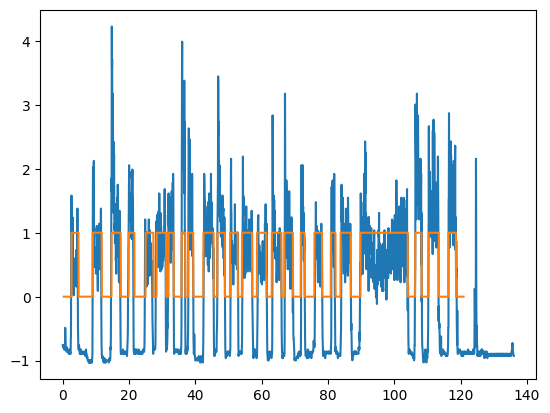

In [6]:
### Sliding intervals

"""

intervals = []
for i in range(len(df)):
    intervals.append(df[i: i + 5].copy())

for i in range(10):
    plt.plot(intervals[i]["Time"], intervals[i]["Signal"])
    plt.show()
    
"""

df_counter = 0

intervals = []

start_time = 0.3

for i in range(len(interval_times)):
    
    end_time = start_time + interval_times[i]
    
#     pd.DataFrame({"Time": final_x[1:], "Signal": final_y[1:]})
    
#     while(df[df_counter]["Time"] < end_time):
#         df_counter += 1
        
#     cur_df = pd.DataFrame({"Time": final_x[1:], "Signal": final_y[1:]})    

    cur_interval = df[df["Time"].between(start_time,end_time)]
    
    intervals.append(df[df["Time"].between(start_time,end_time)])
    
    df.loc[df["Time"].between(start_time, end_time), "State"] = i%2
            
    start_time = end_time

# for i in range(len(intervals)):
#     plt.plot(intervals[i]["Time"], intervals[i]["Signal"])
#     plt.show()
    
plt.plot(df["Time"], df["Signal"])
plt.plot(df["Time"], df["State"])
print(df)
plt.show()

In [8]:
df.to_csv("with_states.csv")

C:\Users\temps\AppData\Local\Temp\ipykernel_8324\1071139519.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (6,4))


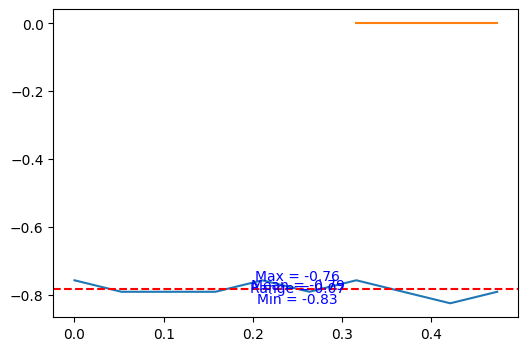

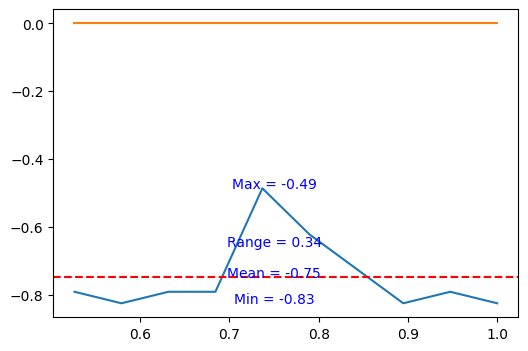

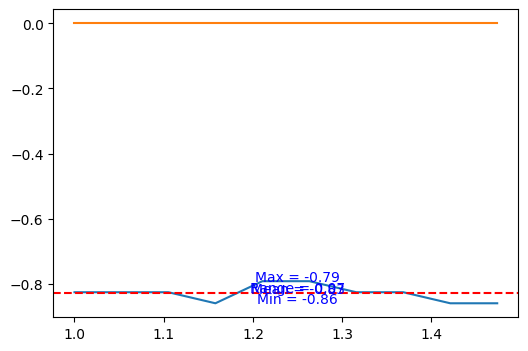

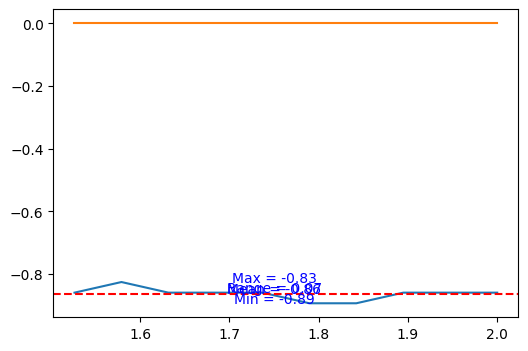

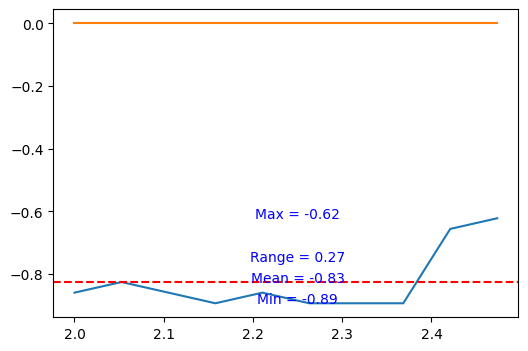

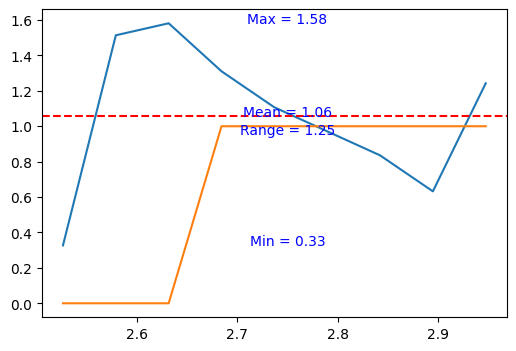

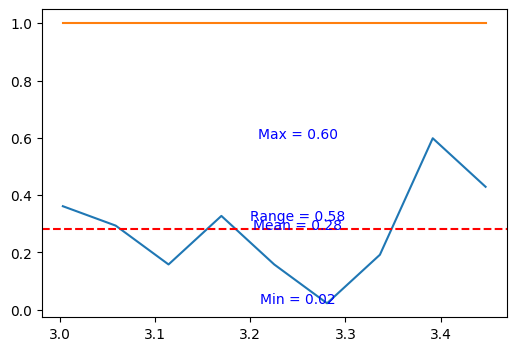

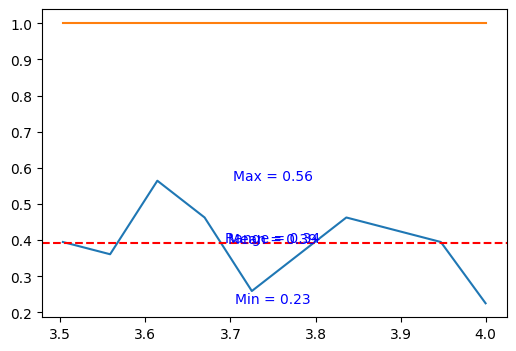

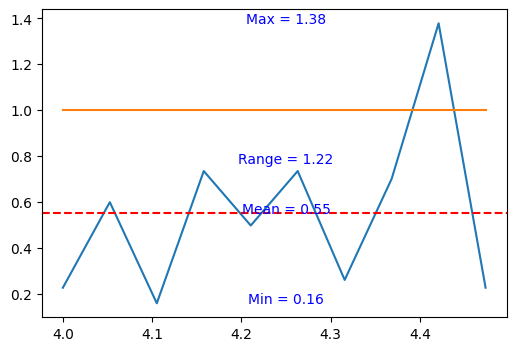

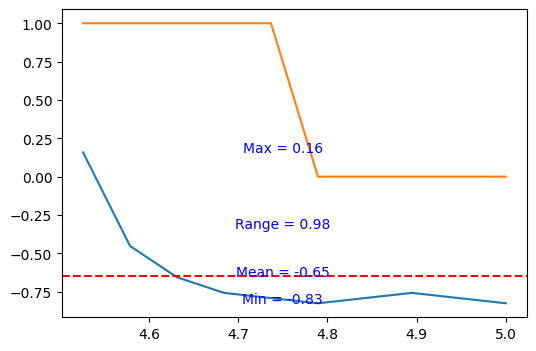

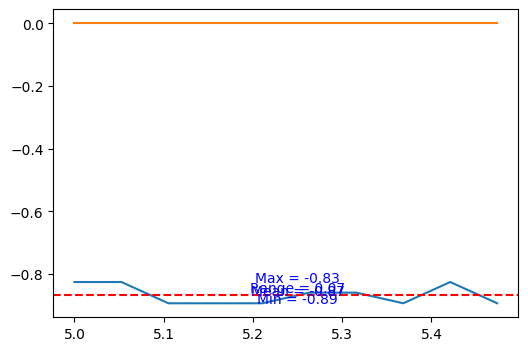

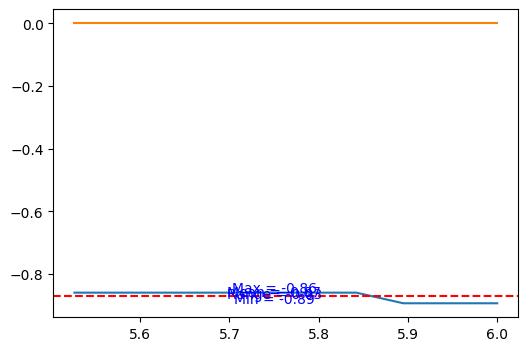

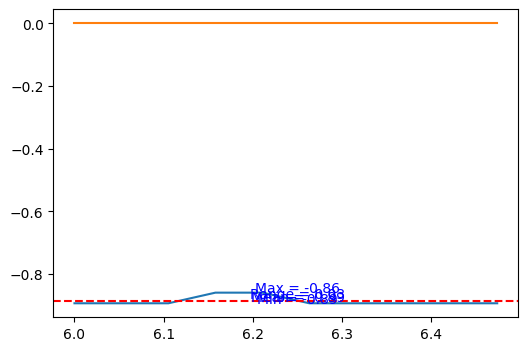

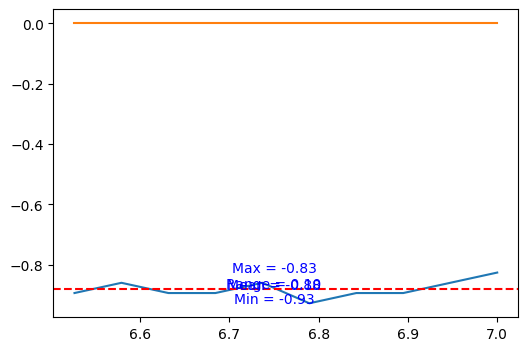

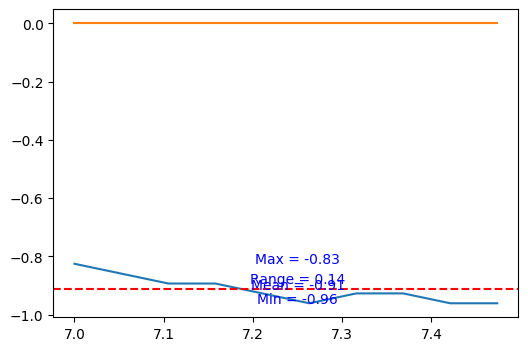

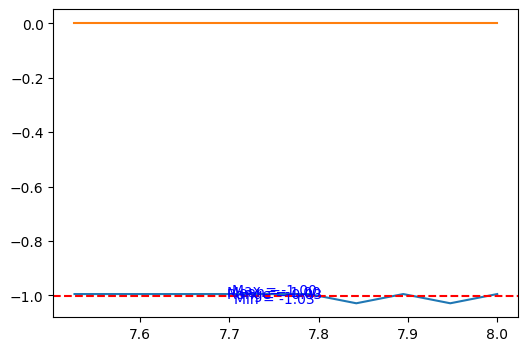

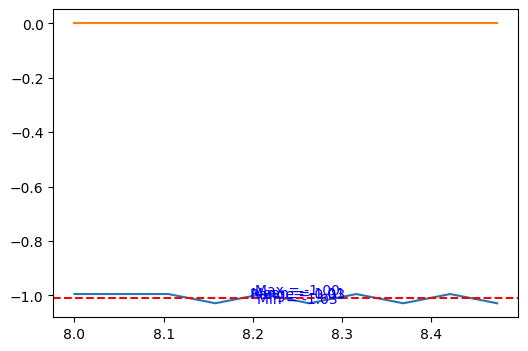

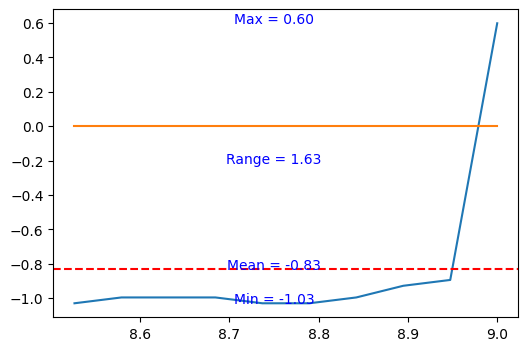

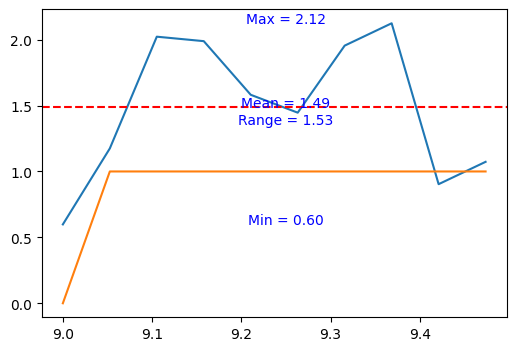

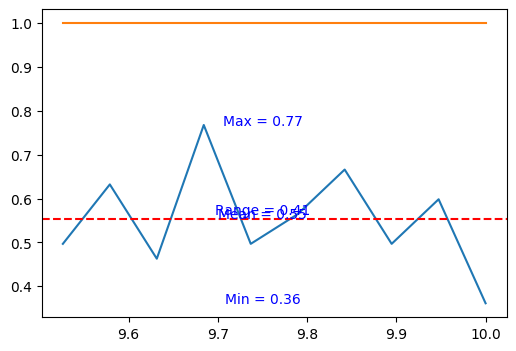

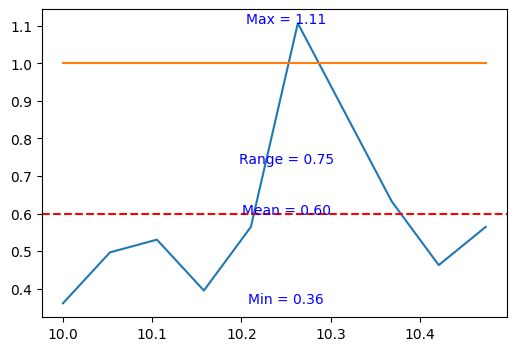

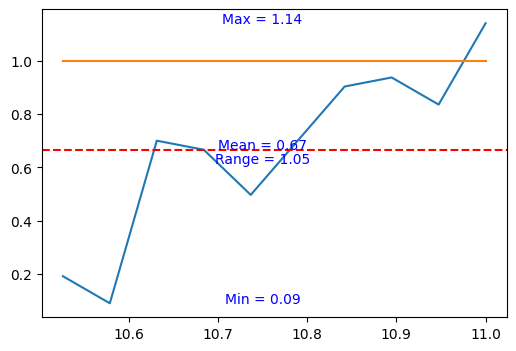

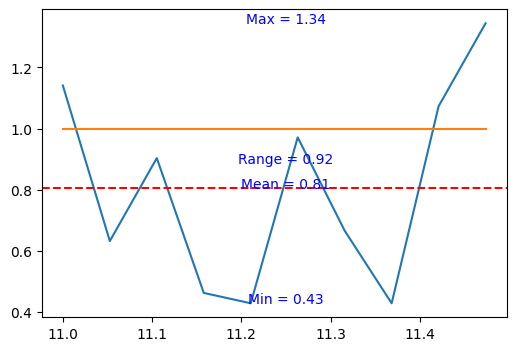

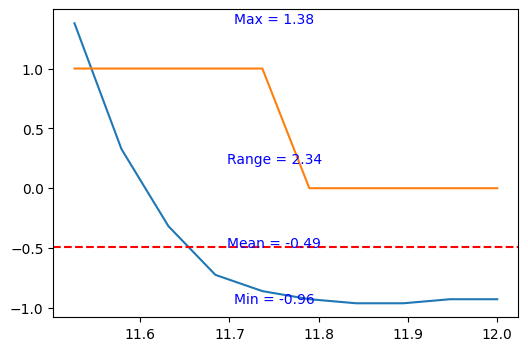

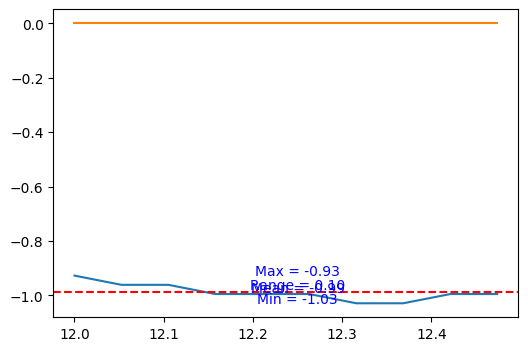

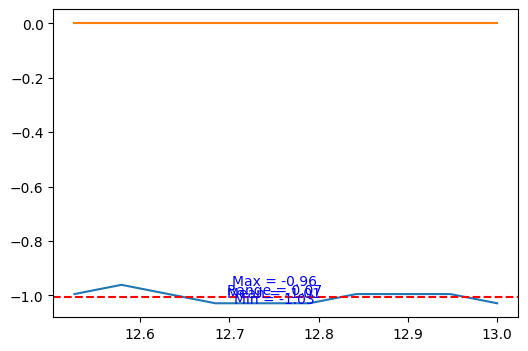

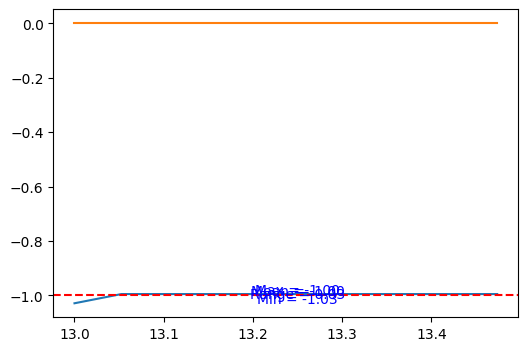

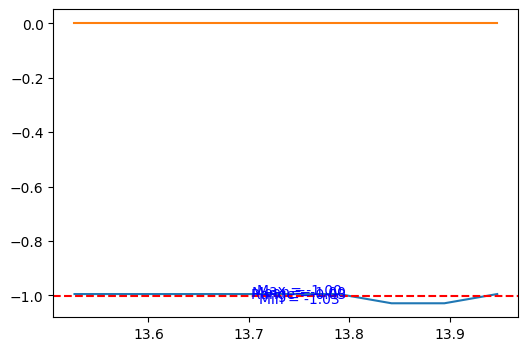

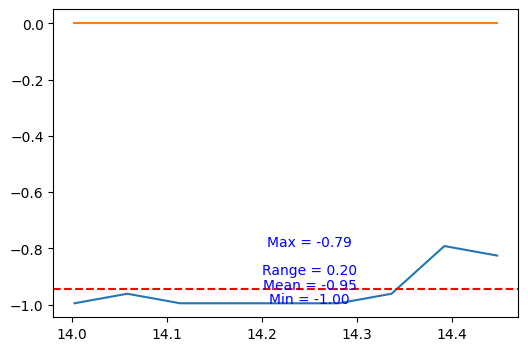

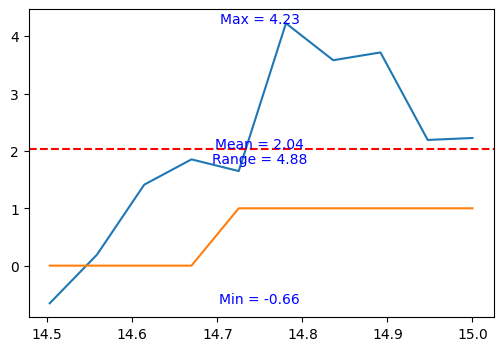

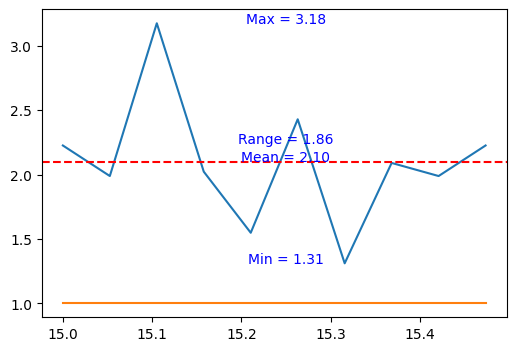

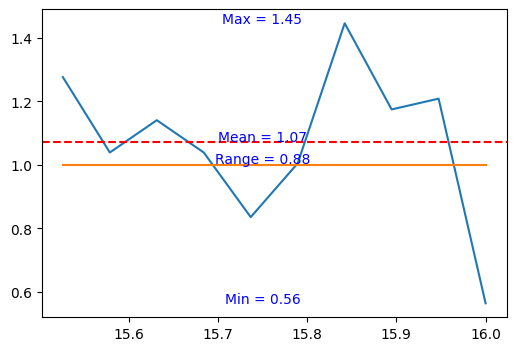

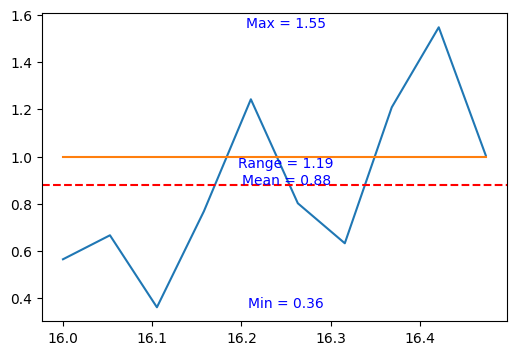

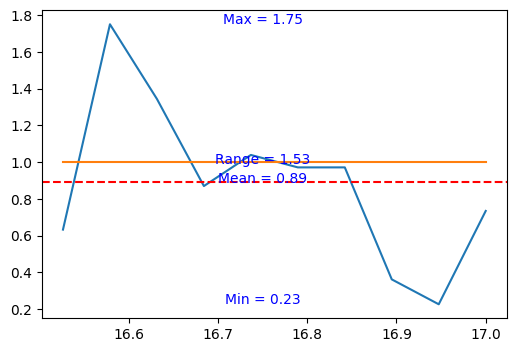

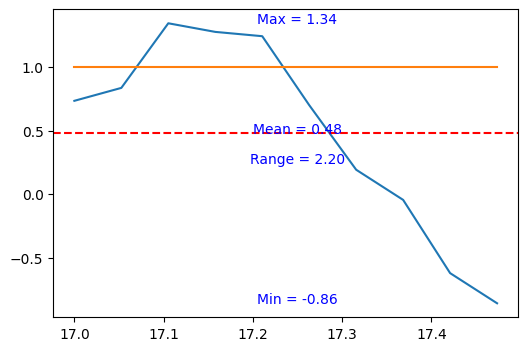

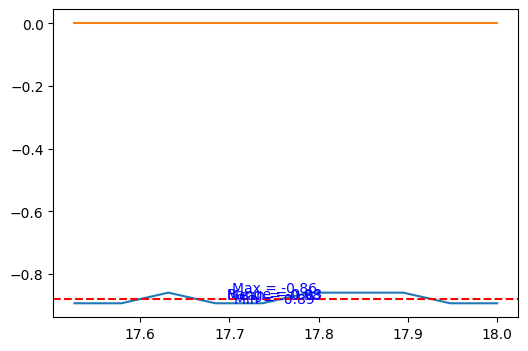

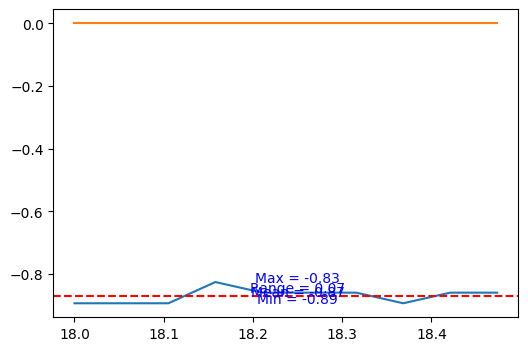

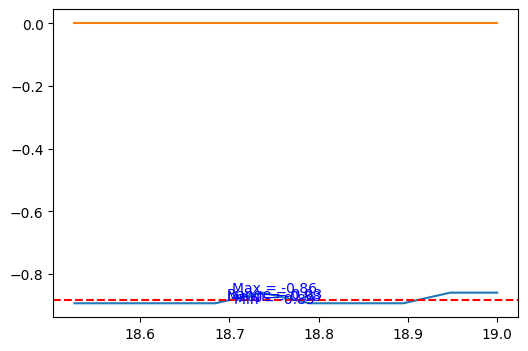

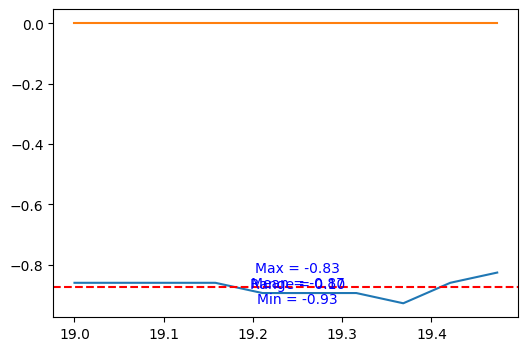

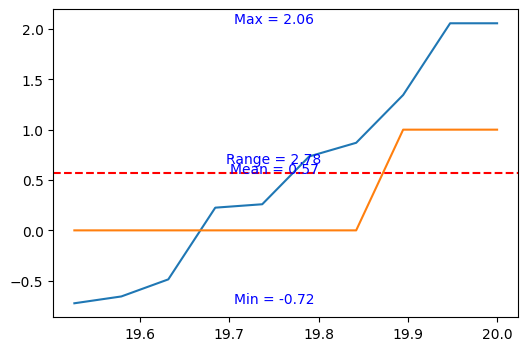

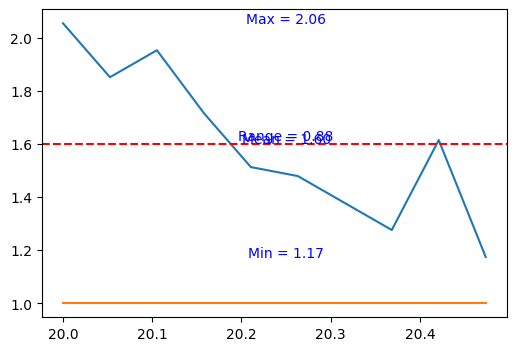

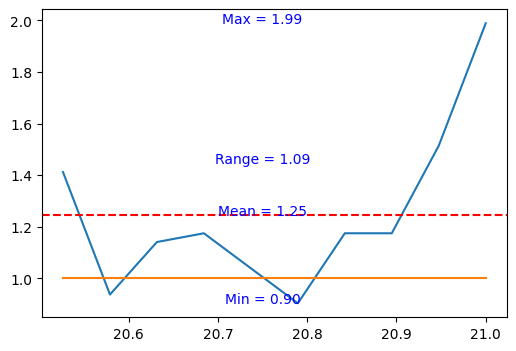

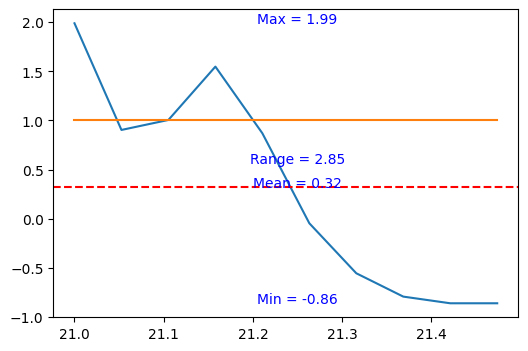

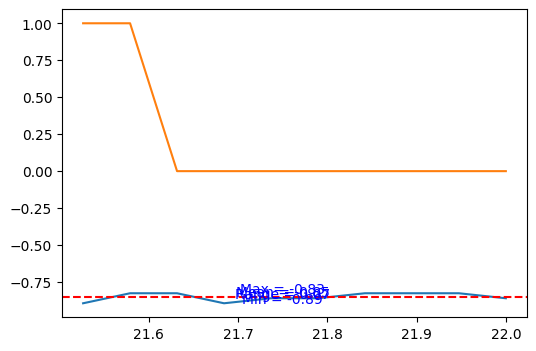

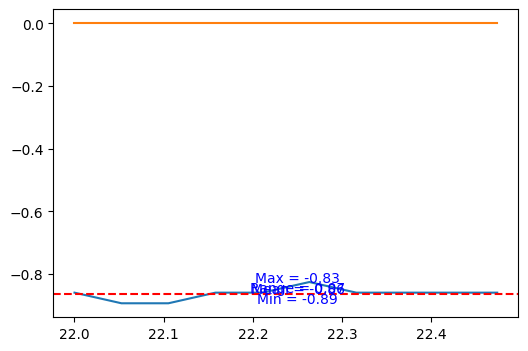

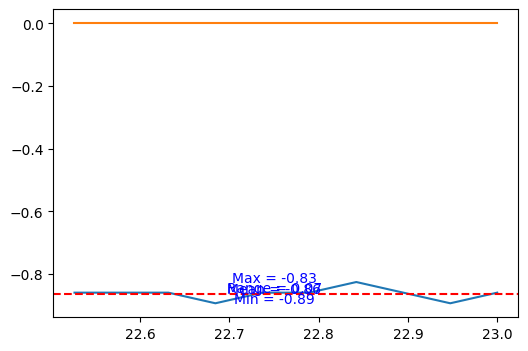

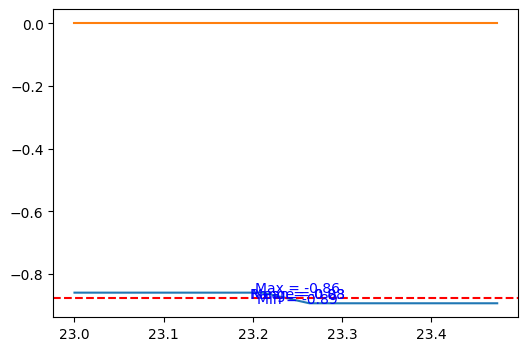

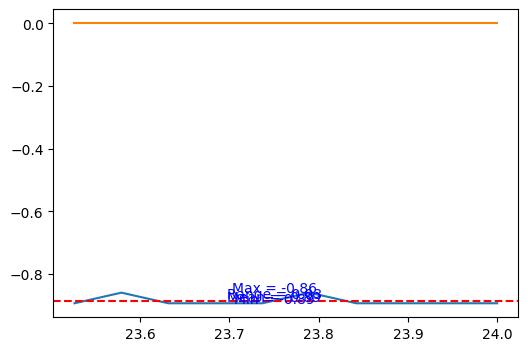

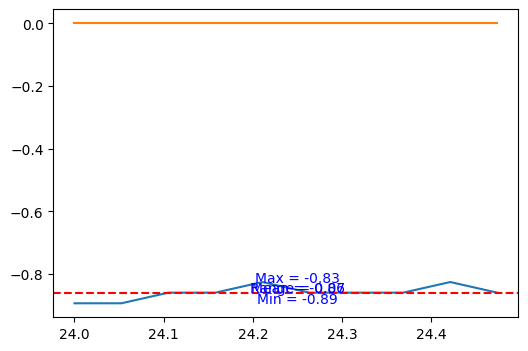

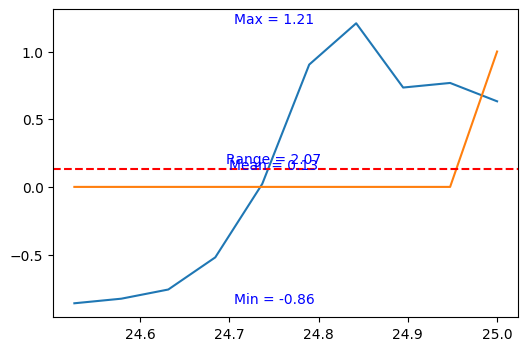

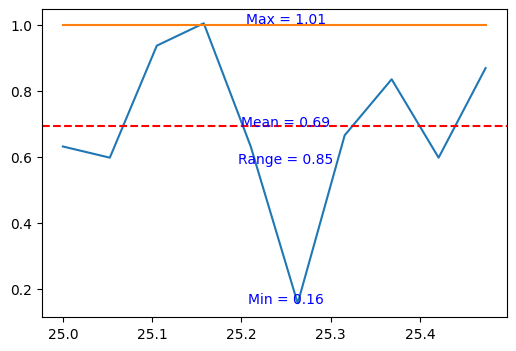

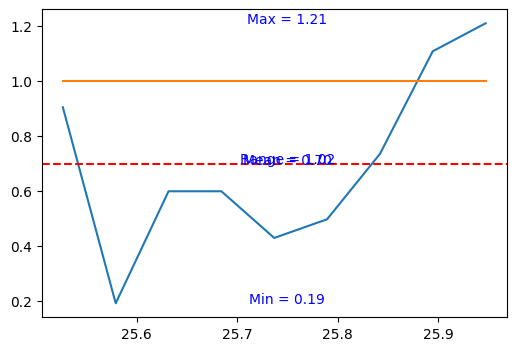

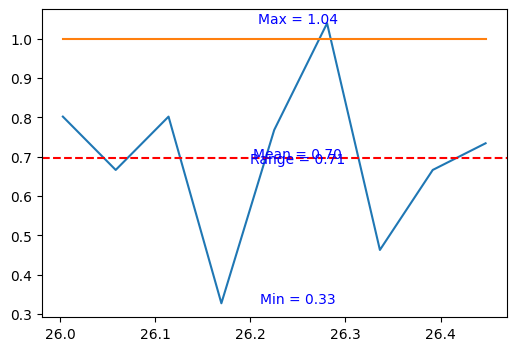

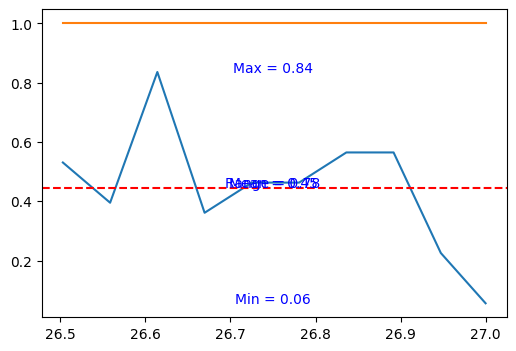

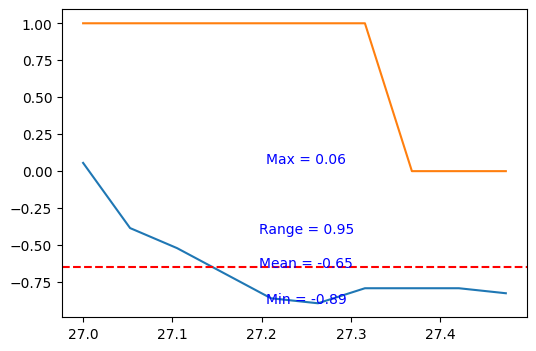

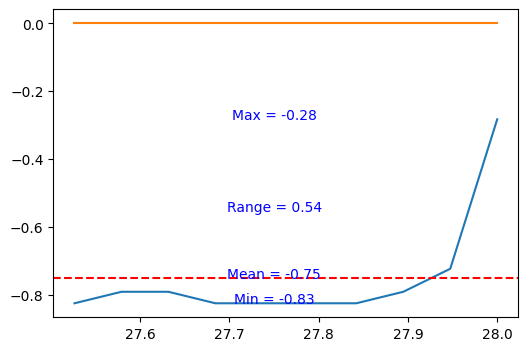

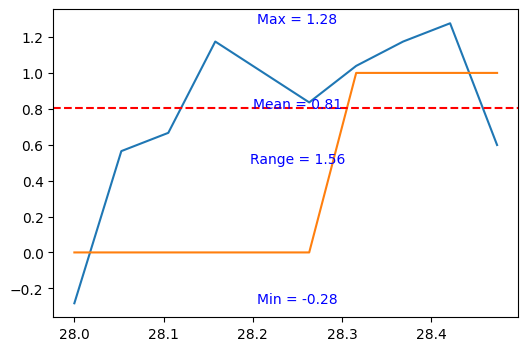

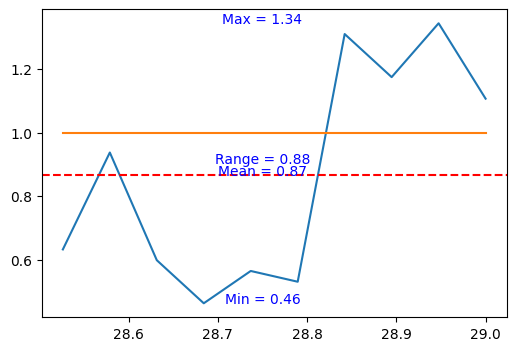

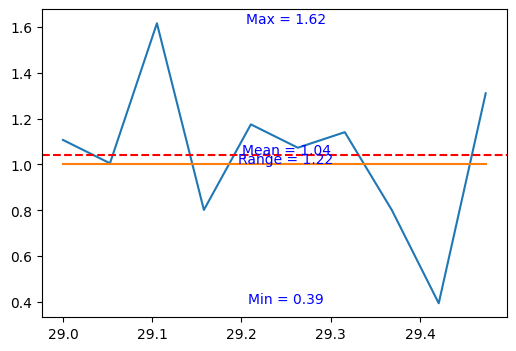

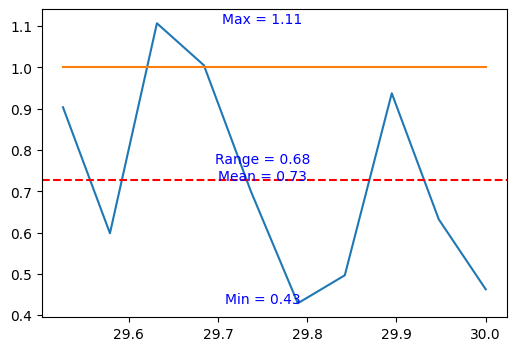

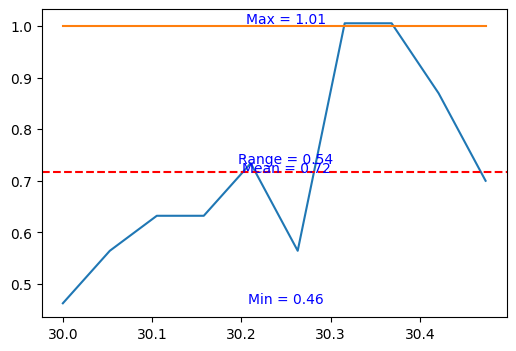

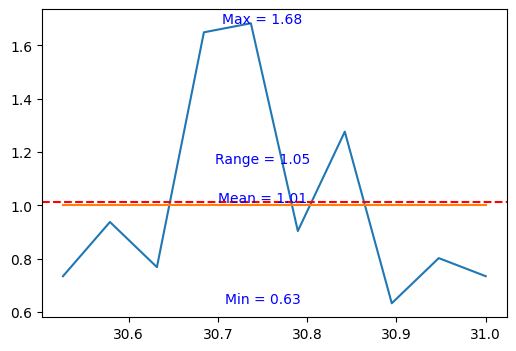

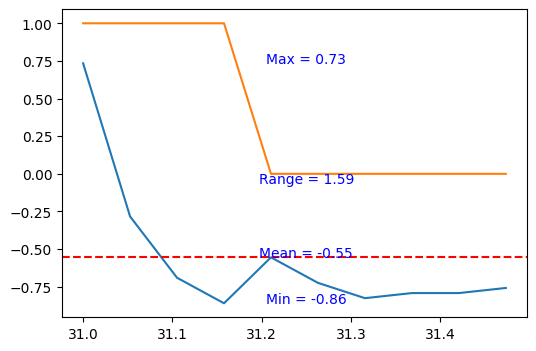

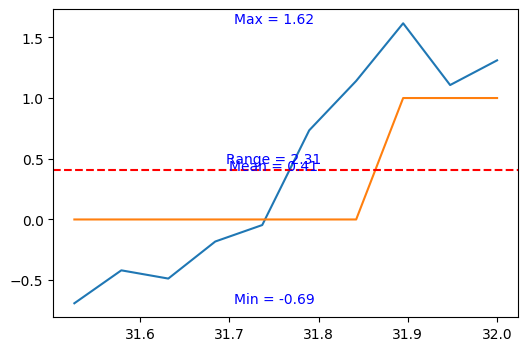

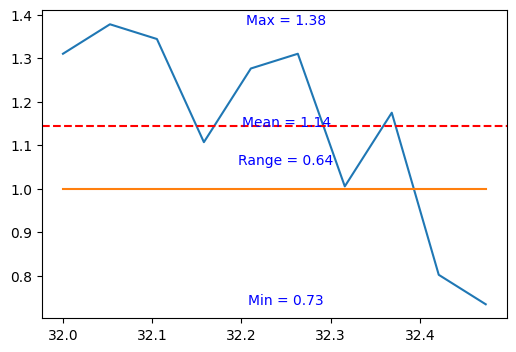

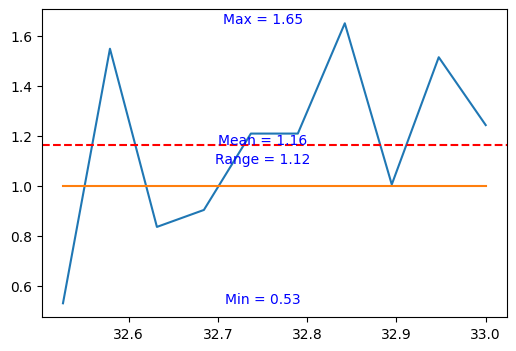

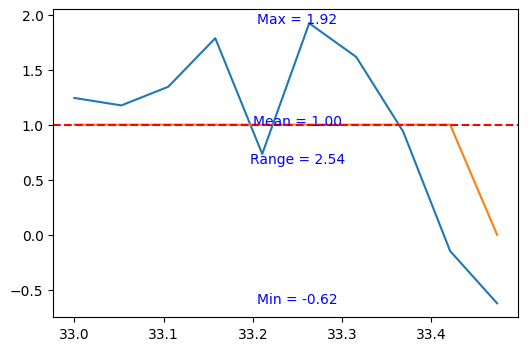

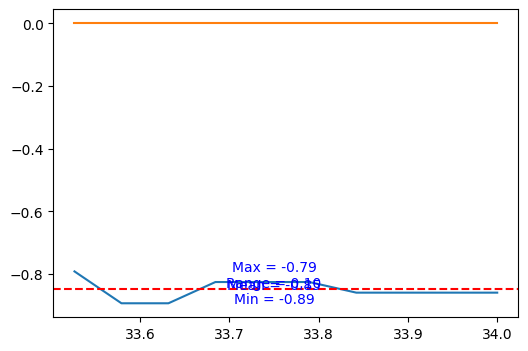

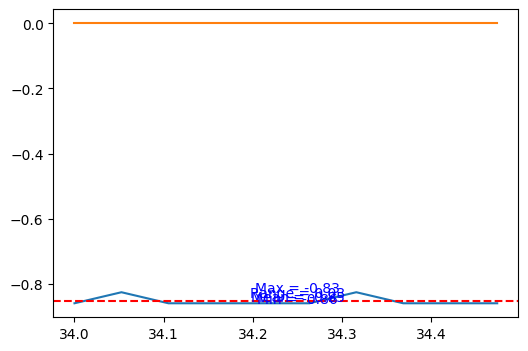

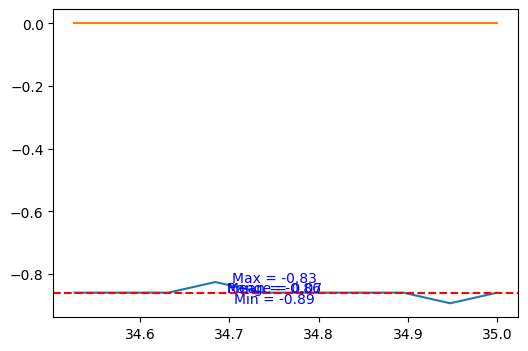

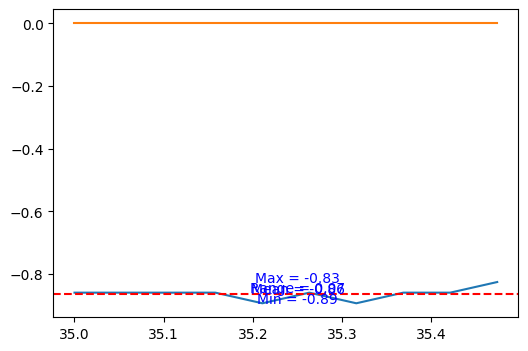

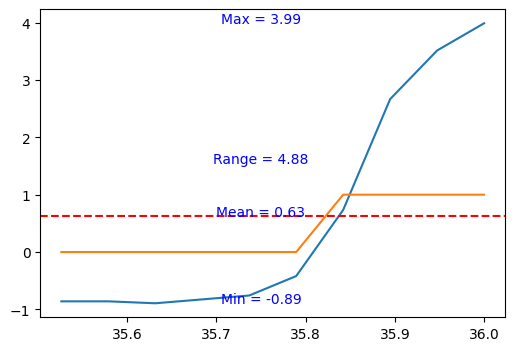

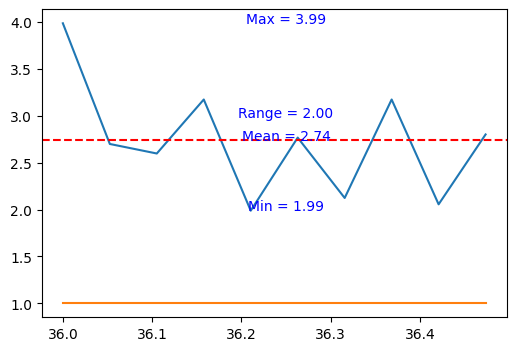

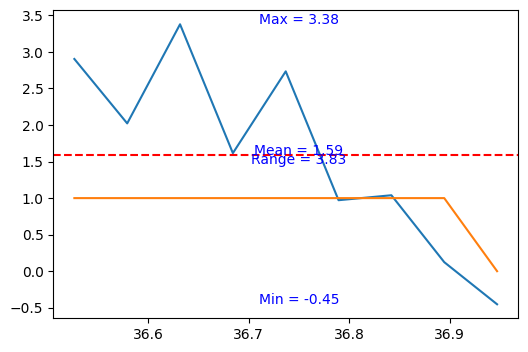

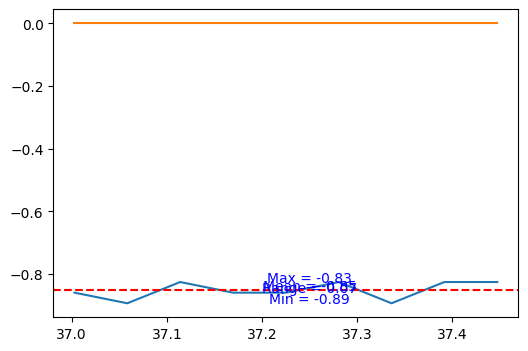

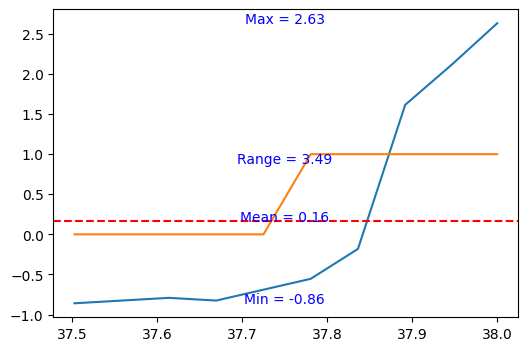

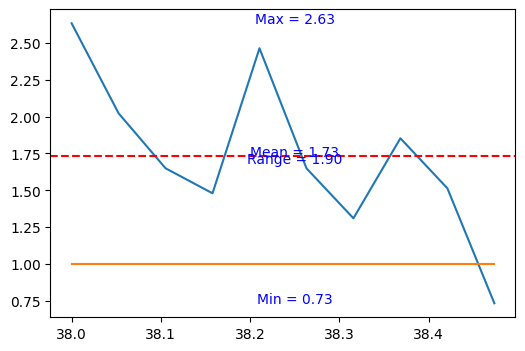

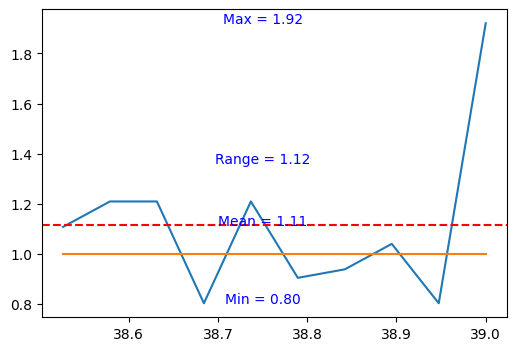

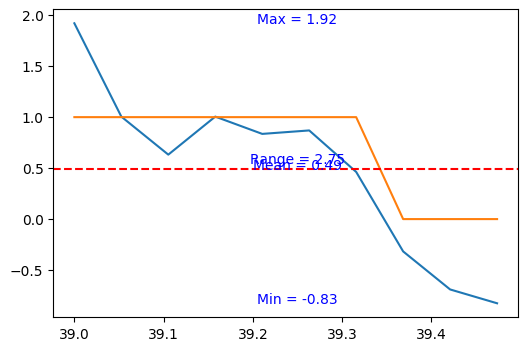

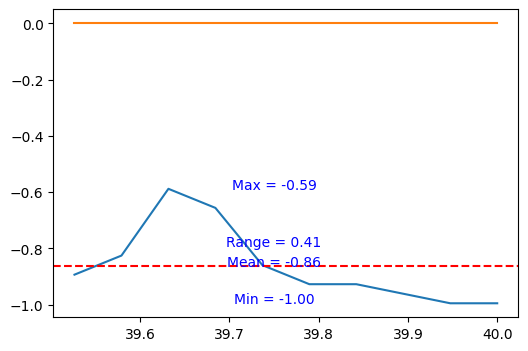

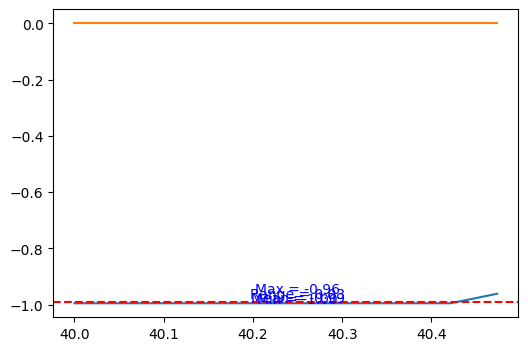

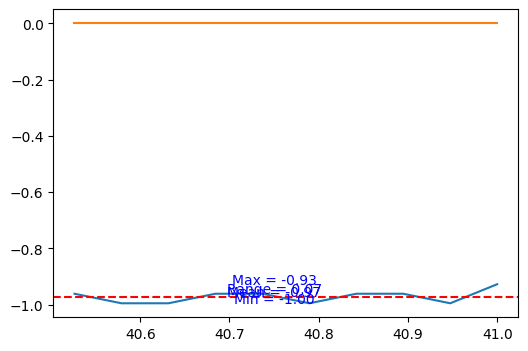

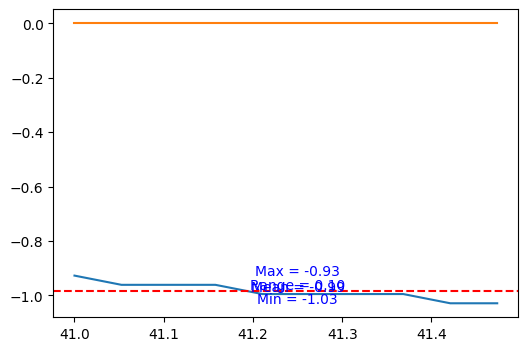

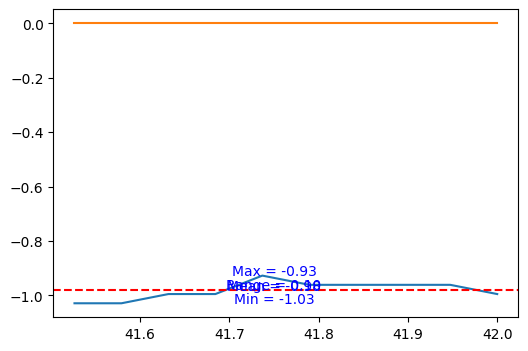

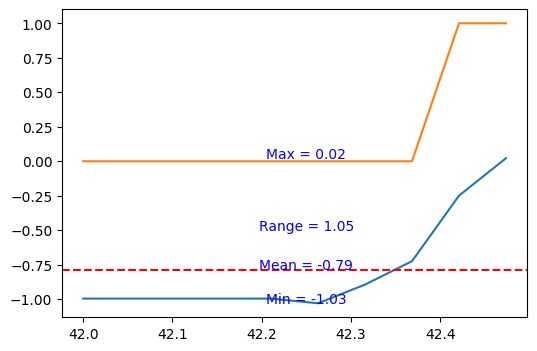

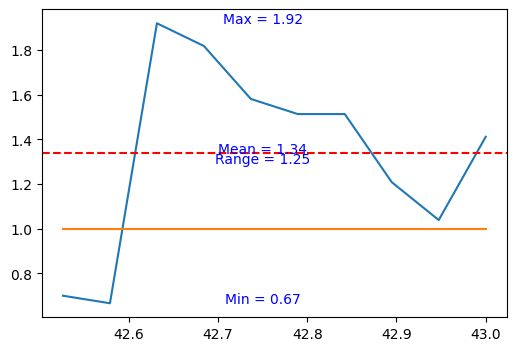

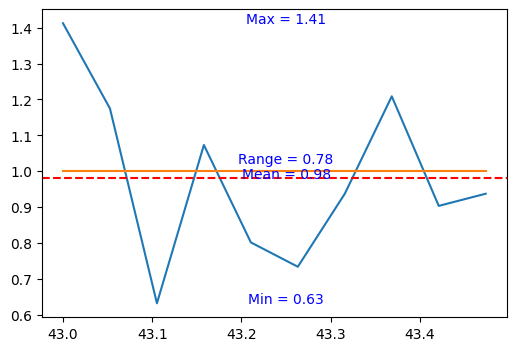

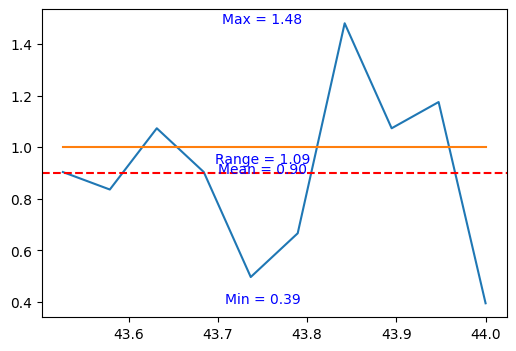

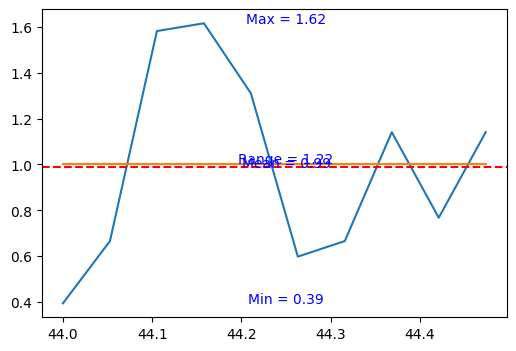

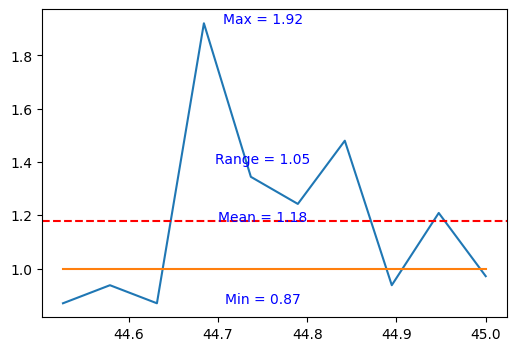

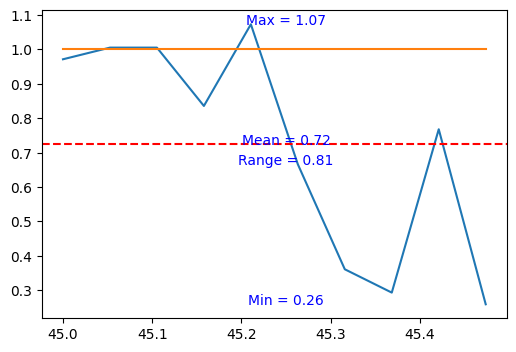

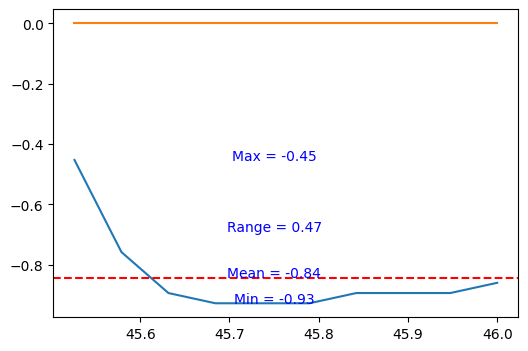

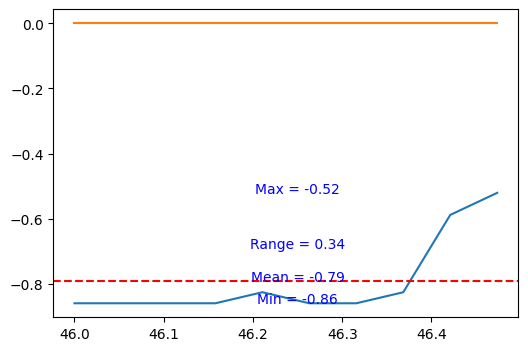

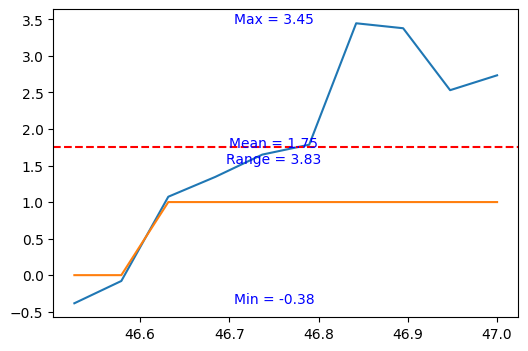

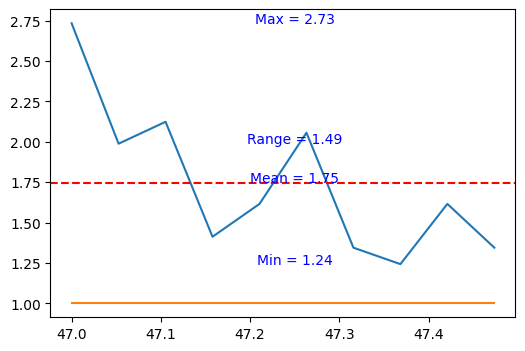

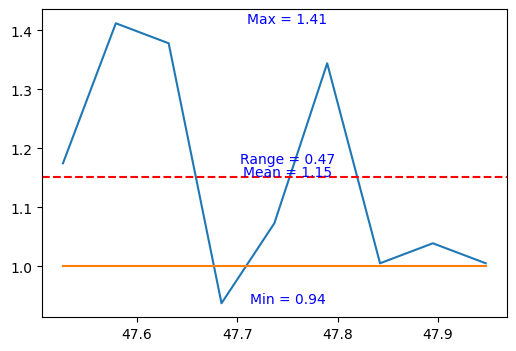

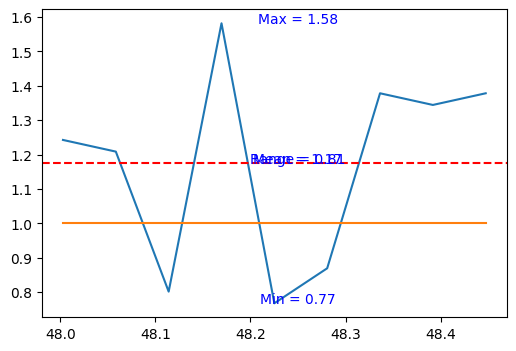

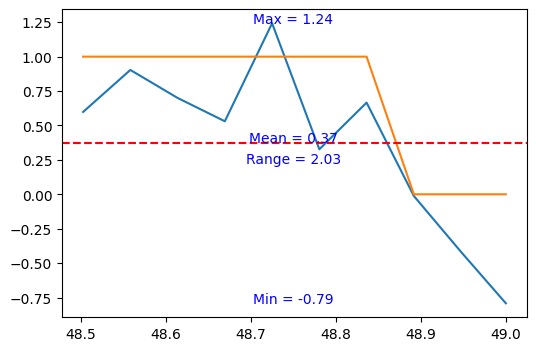

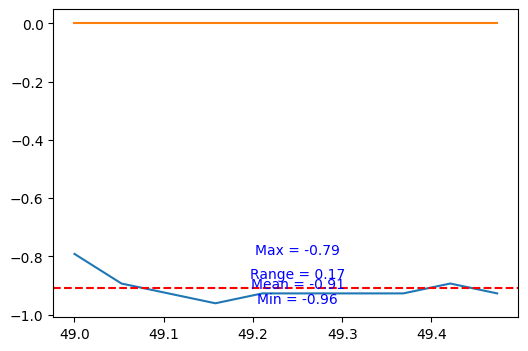

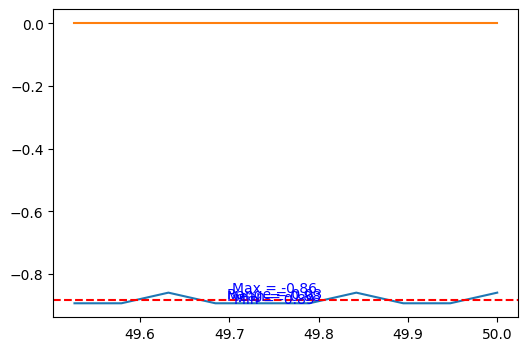

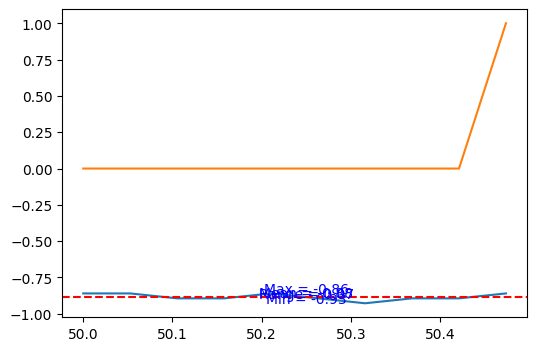

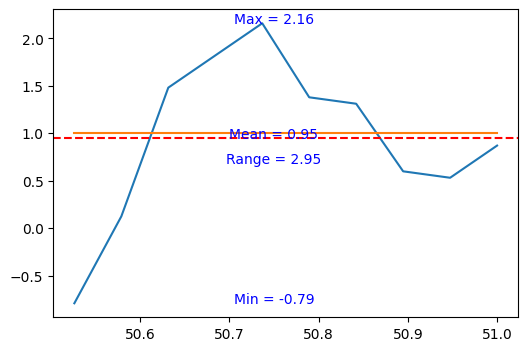

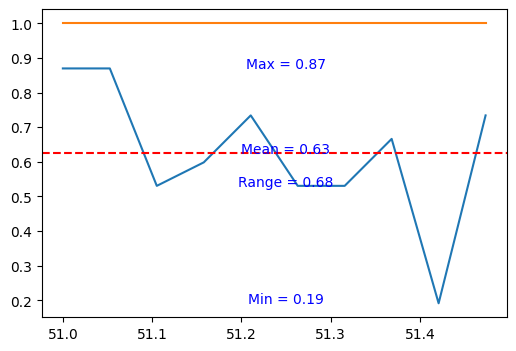

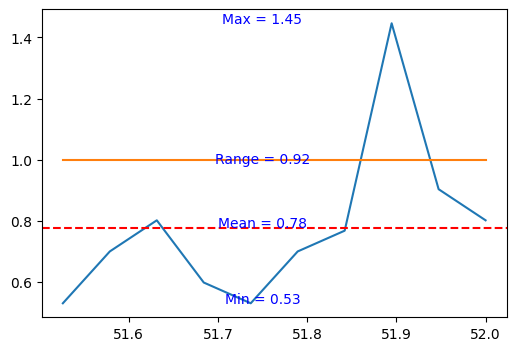

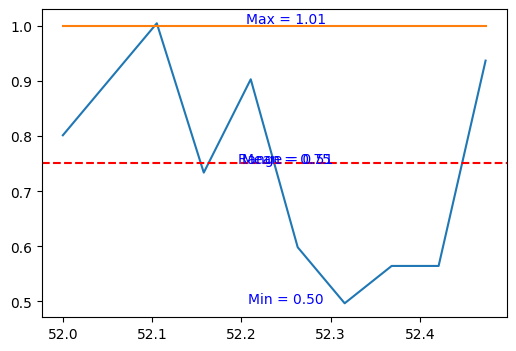

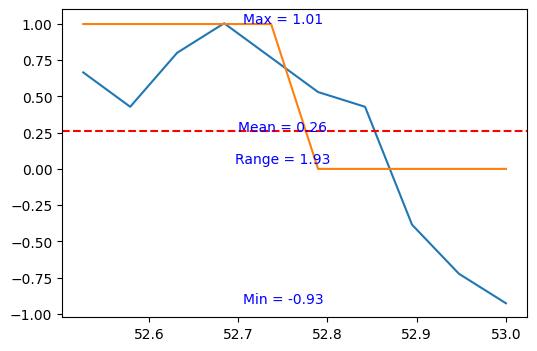

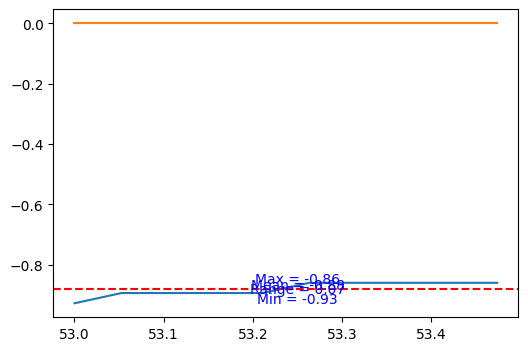

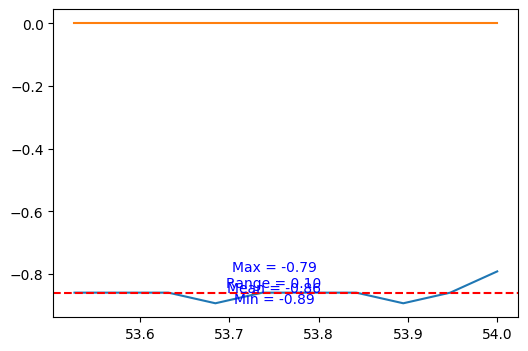

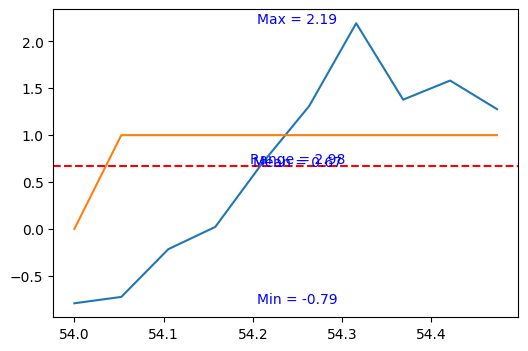

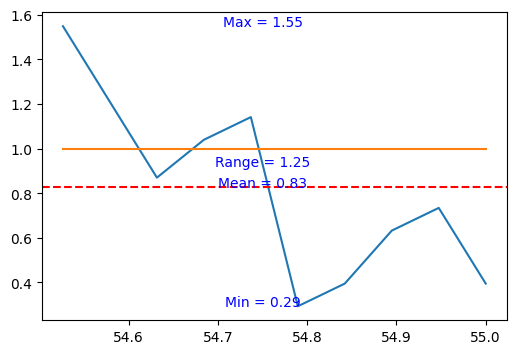

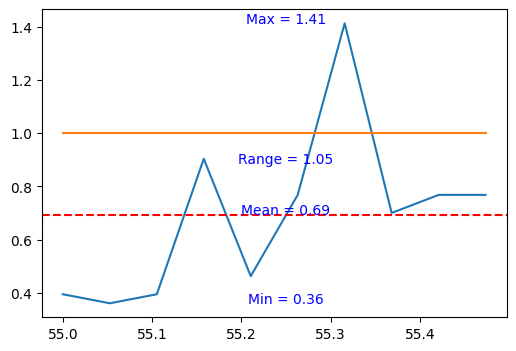

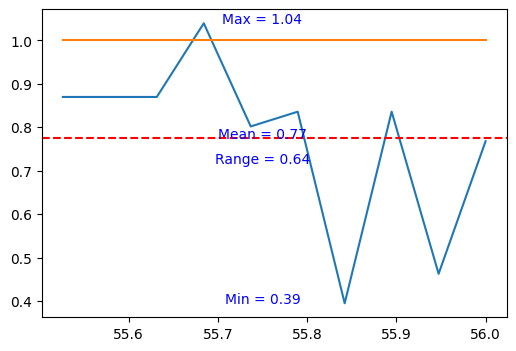

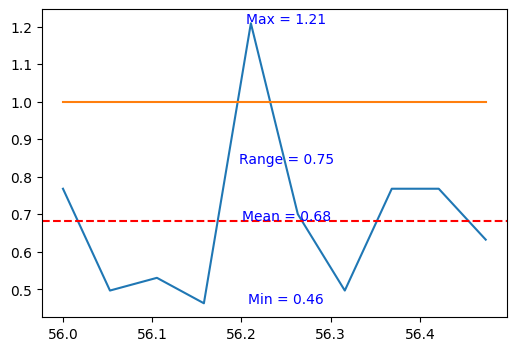

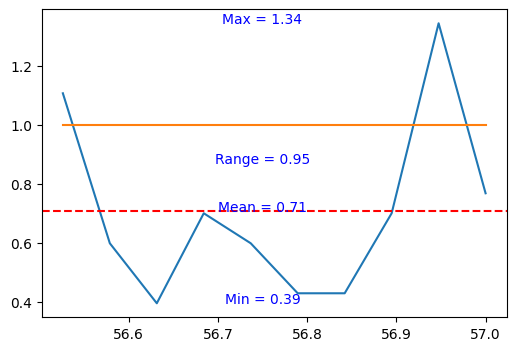

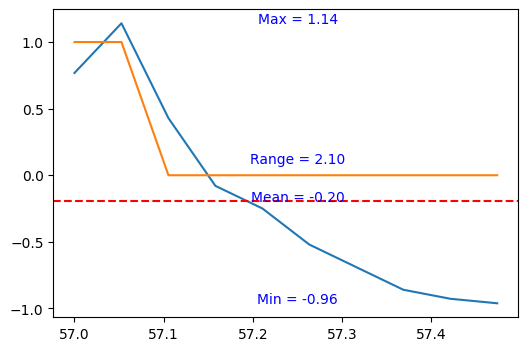

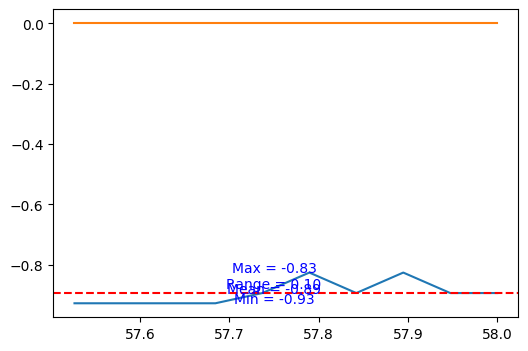

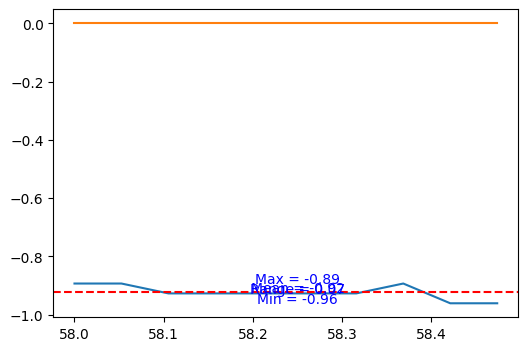

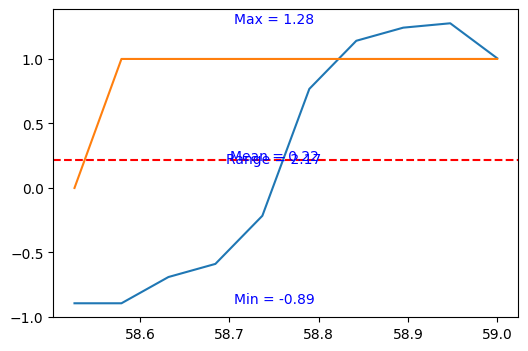

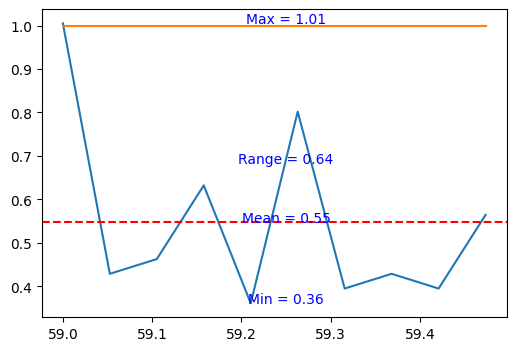

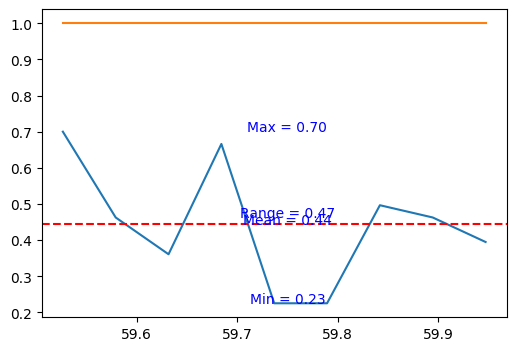

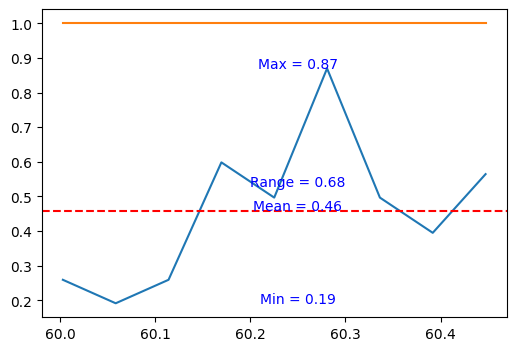

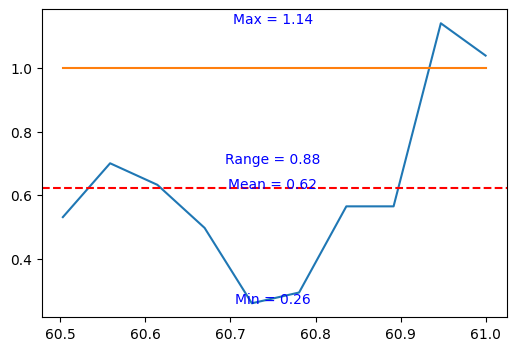

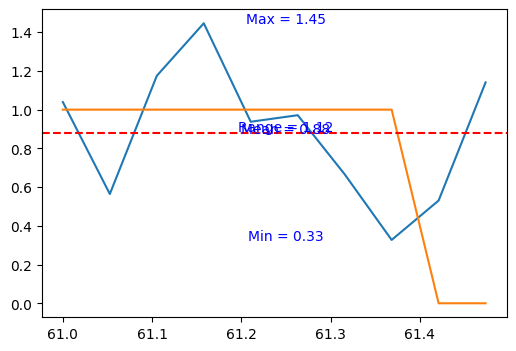

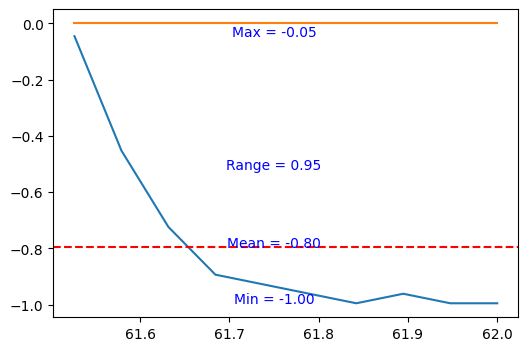

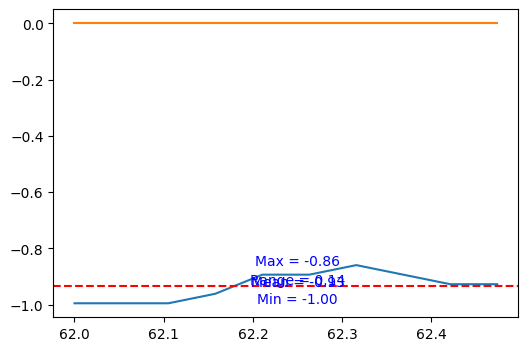

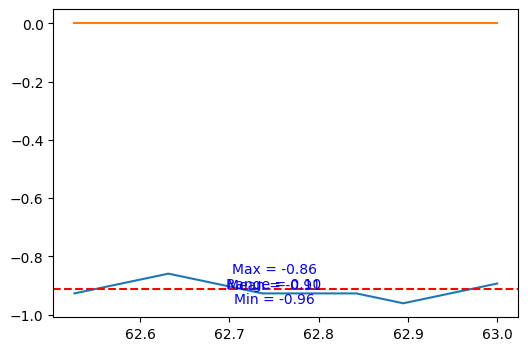

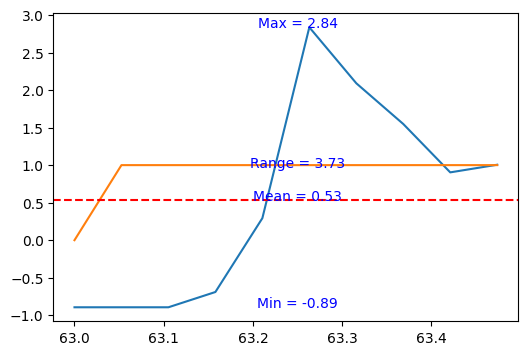

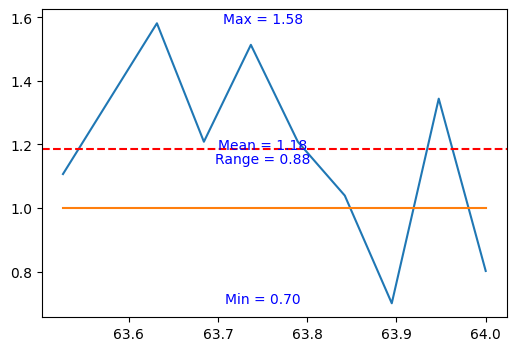

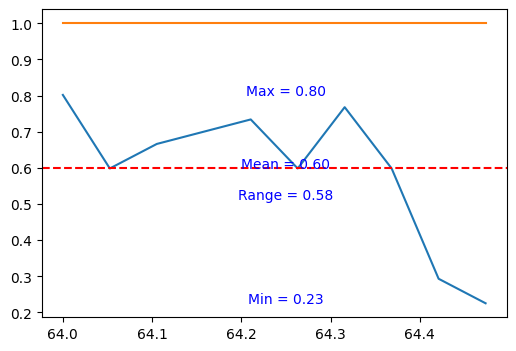

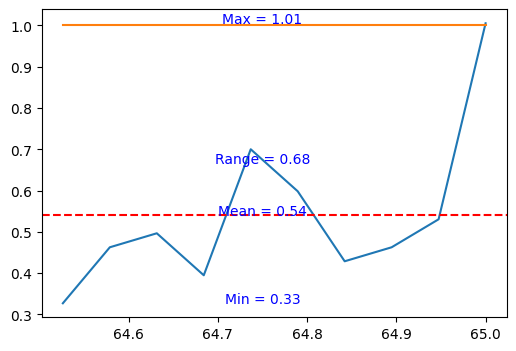

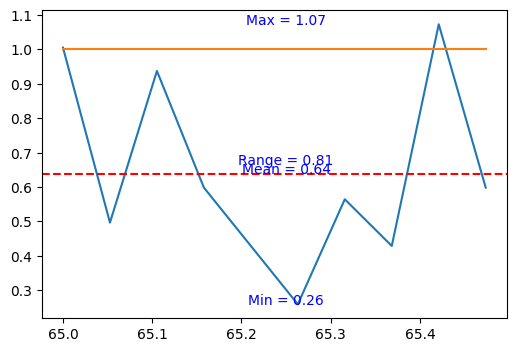

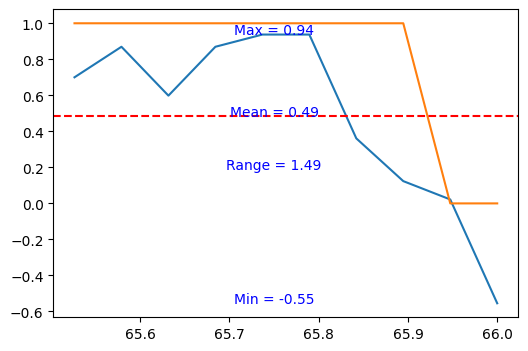

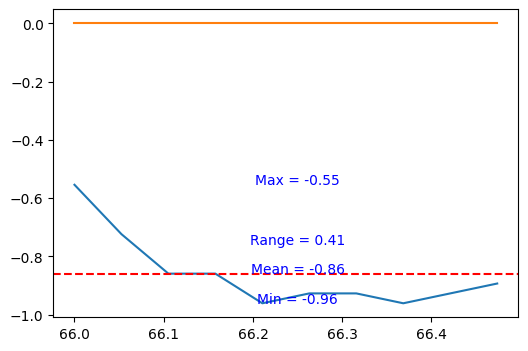

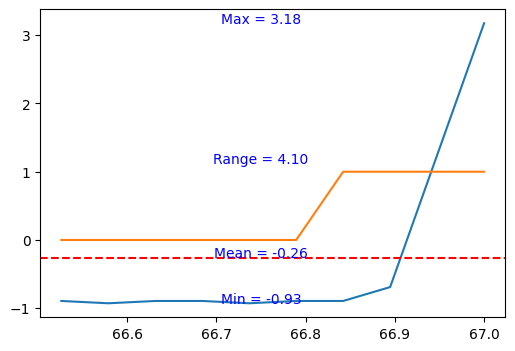

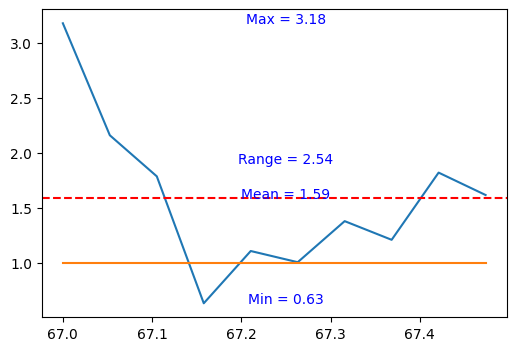

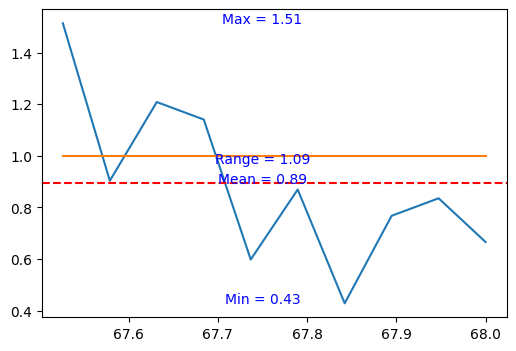

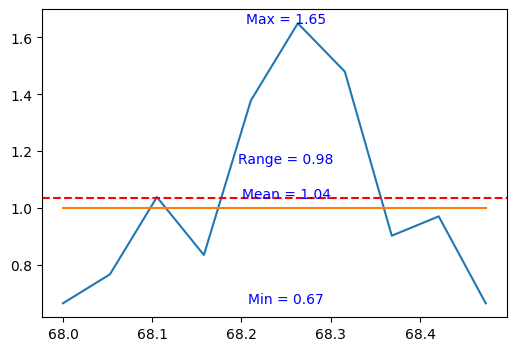

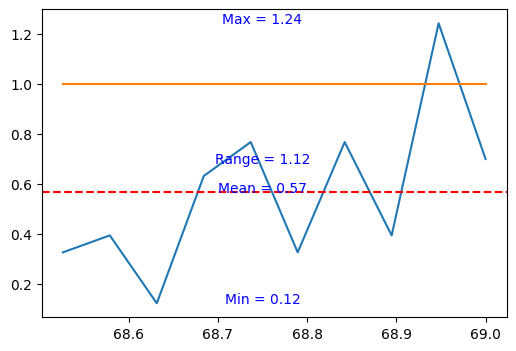

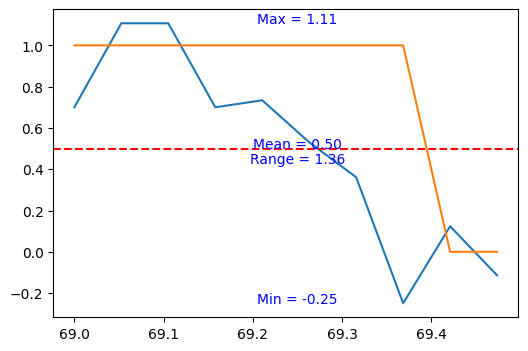

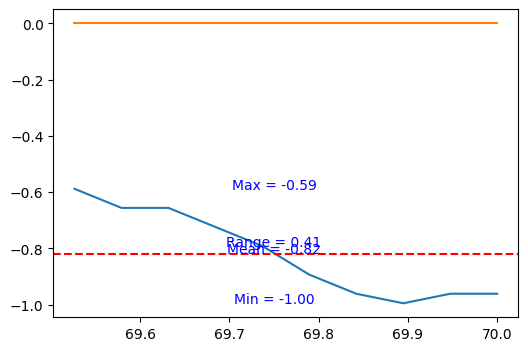

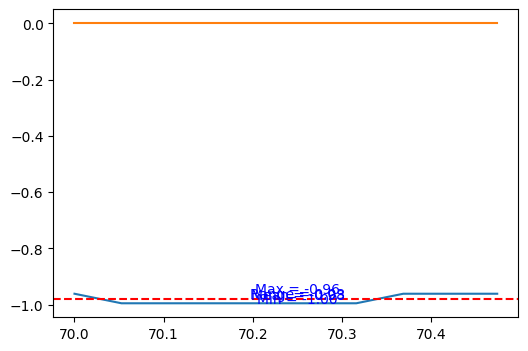

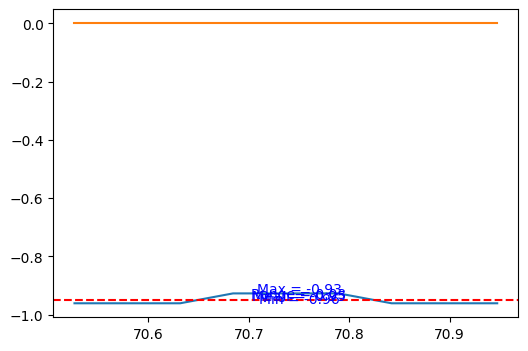

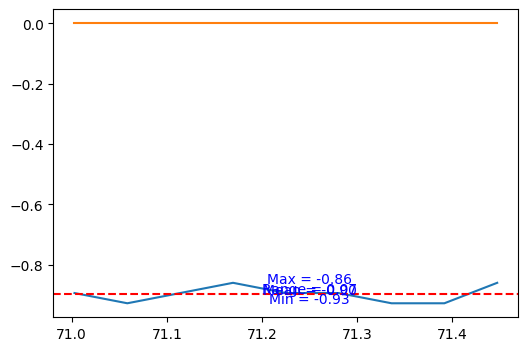

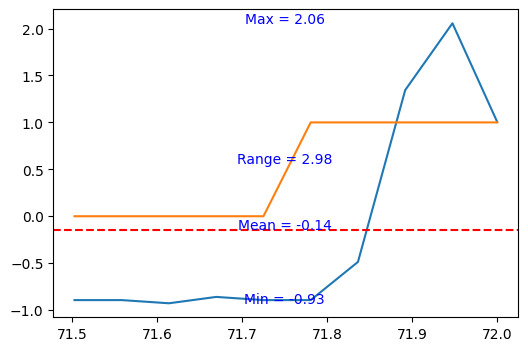

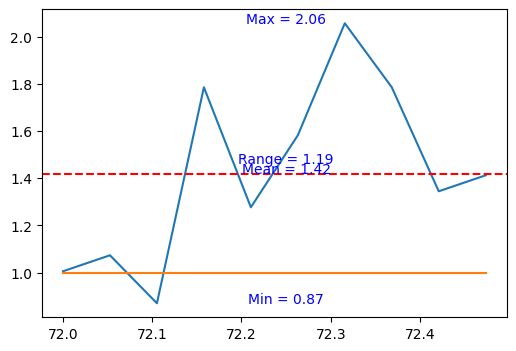

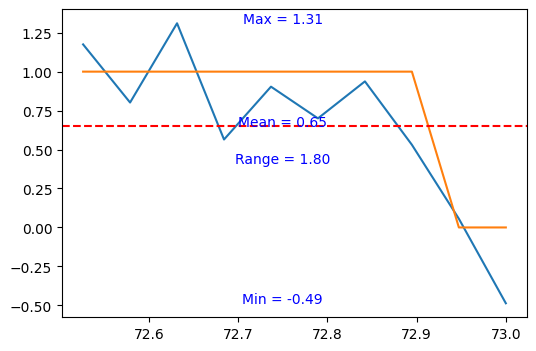

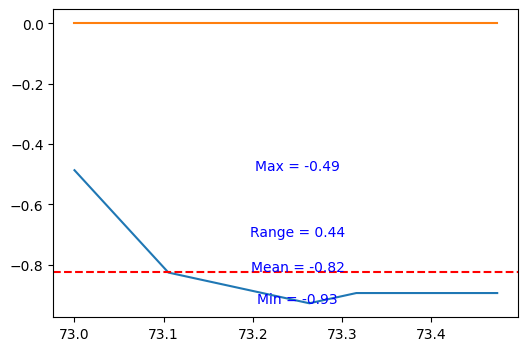

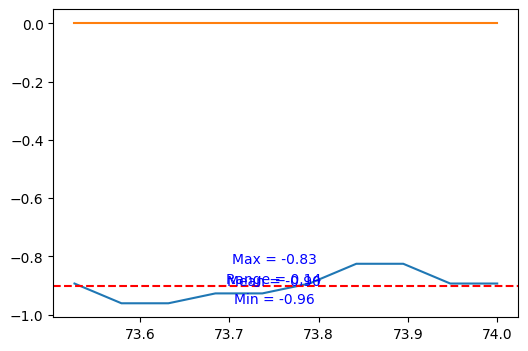

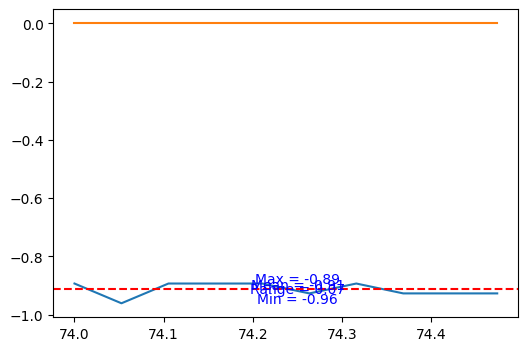

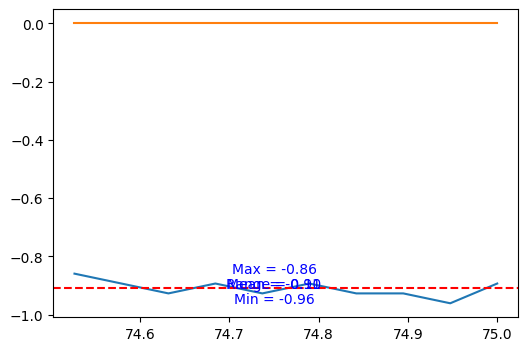

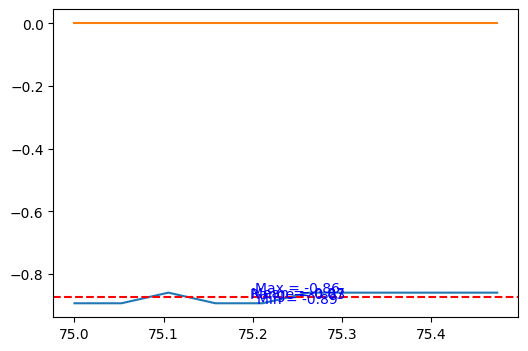

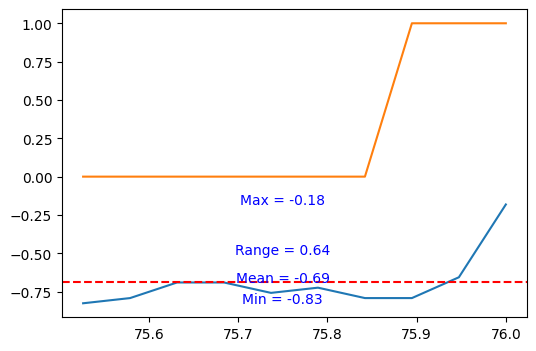

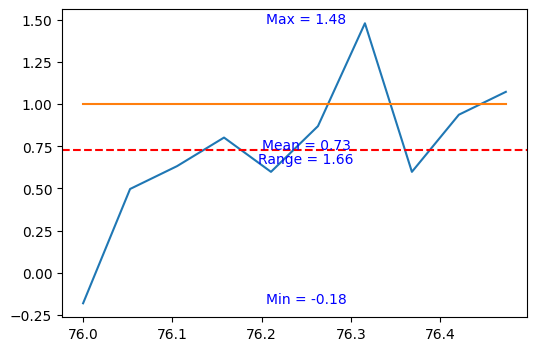

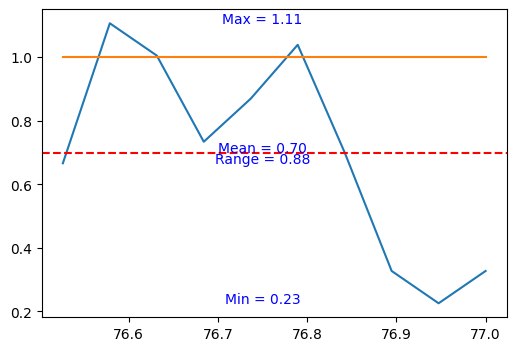

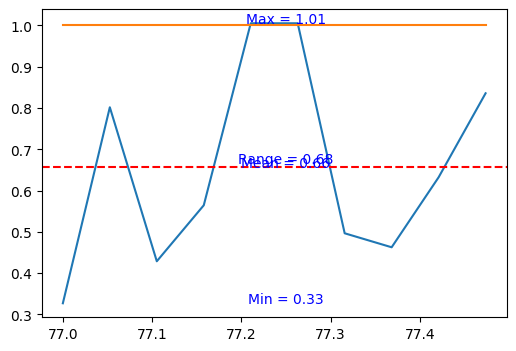

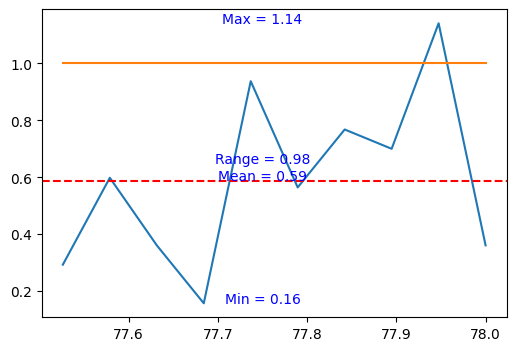

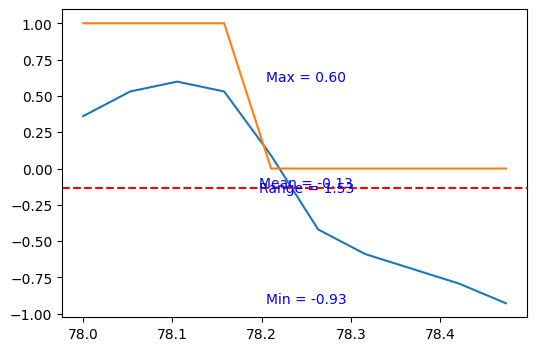

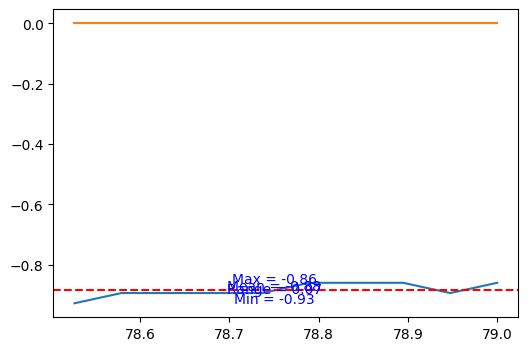

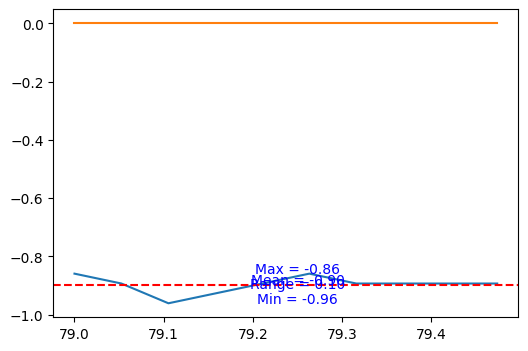

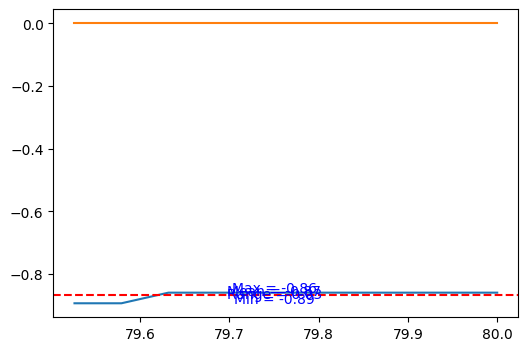

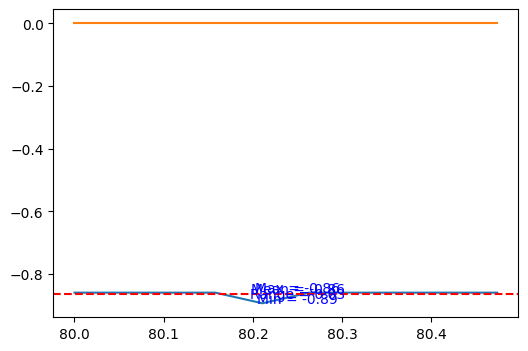

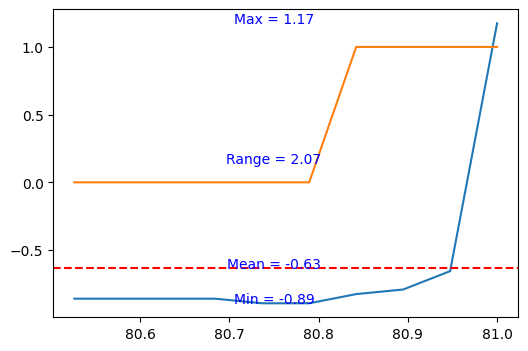

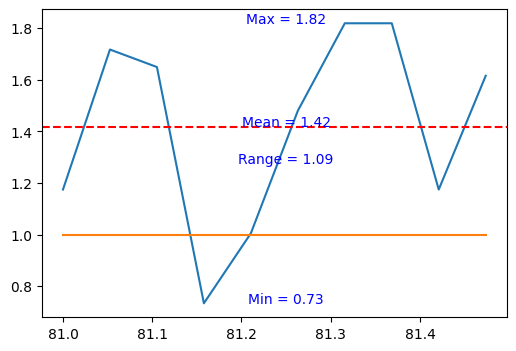

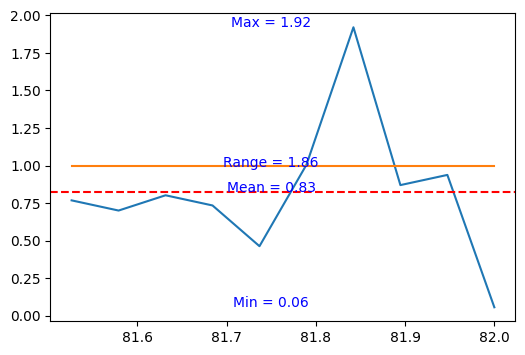

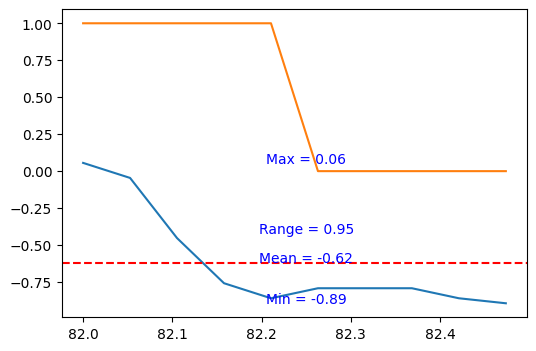

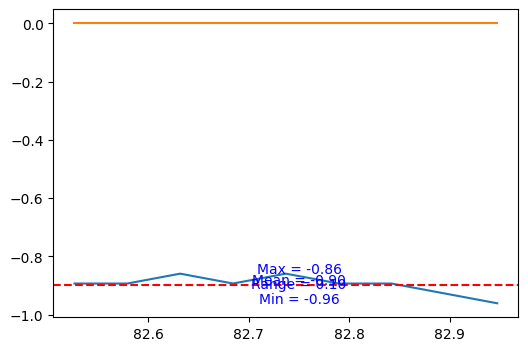

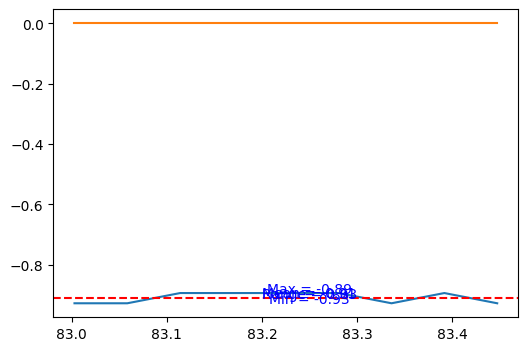

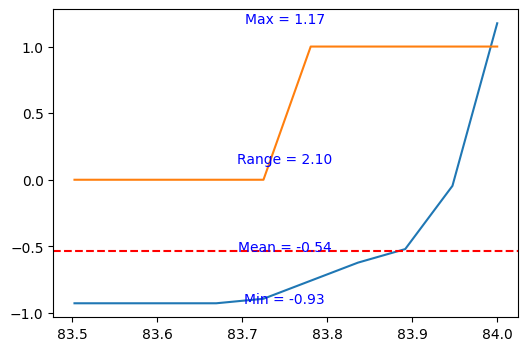

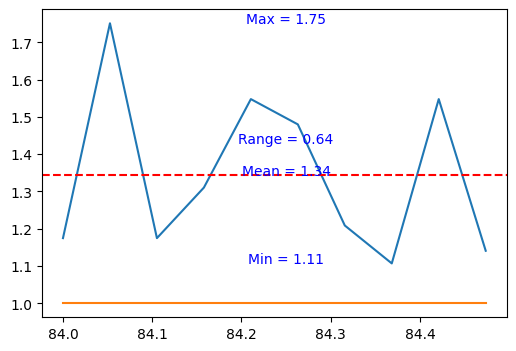

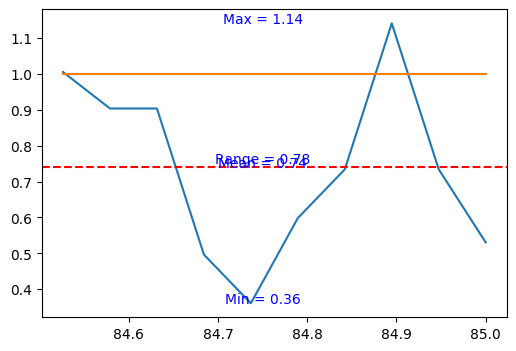

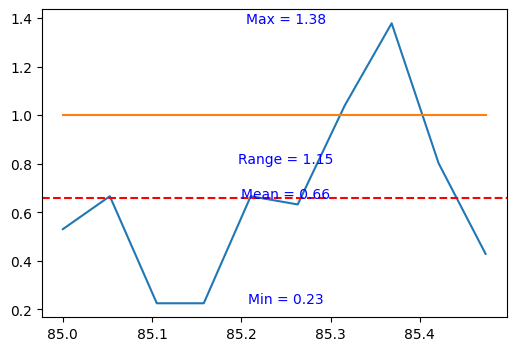

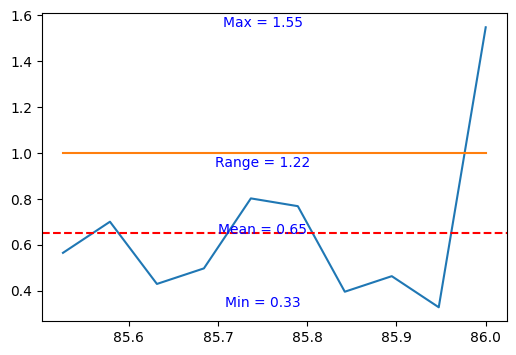

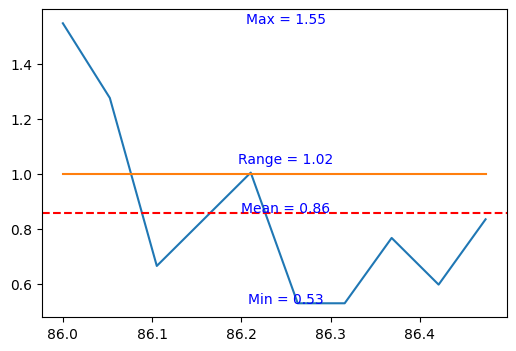

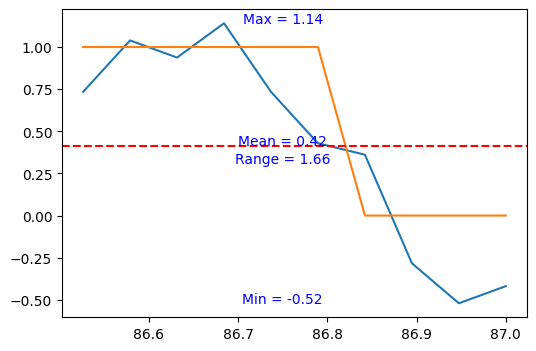

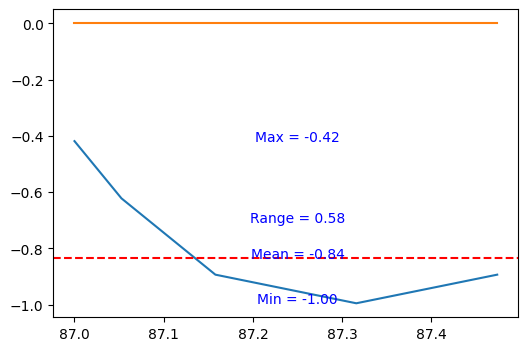

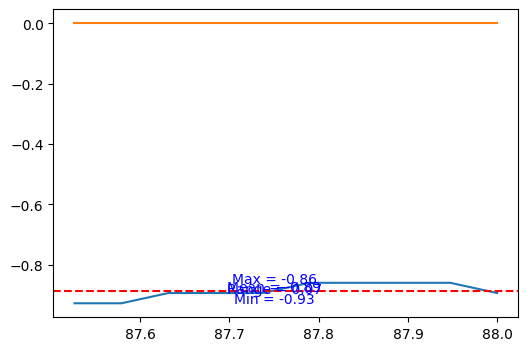

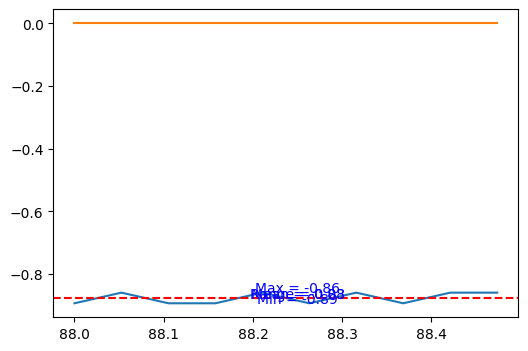

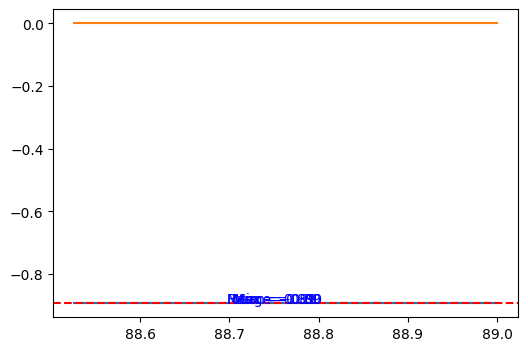

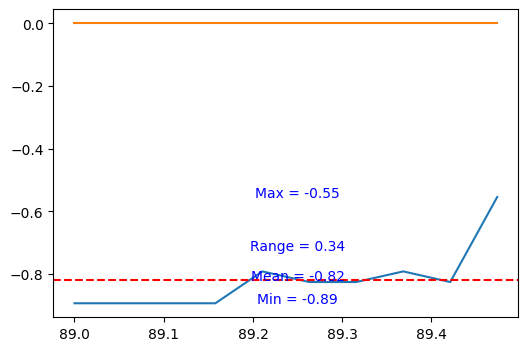

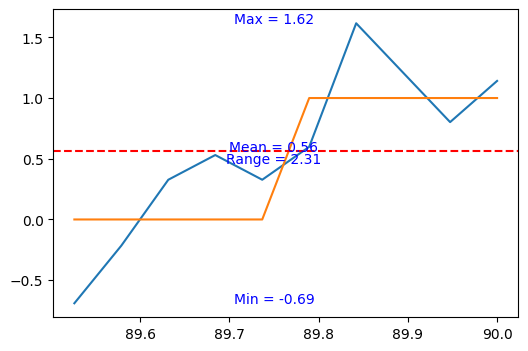

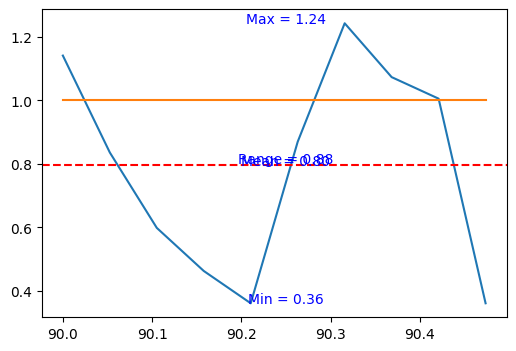

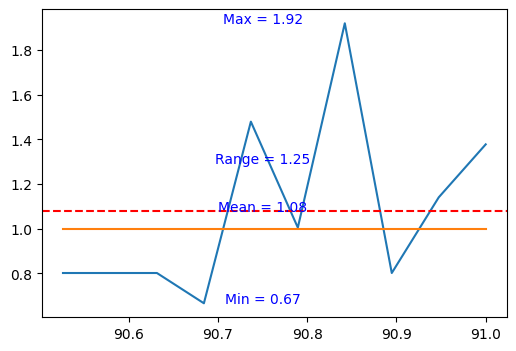

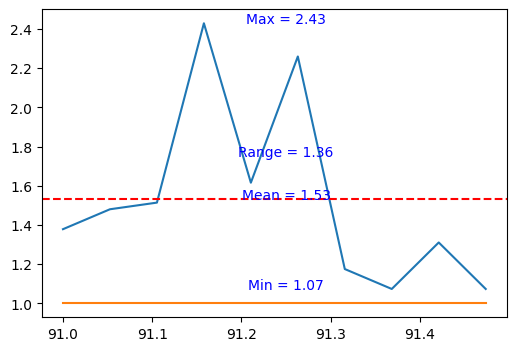

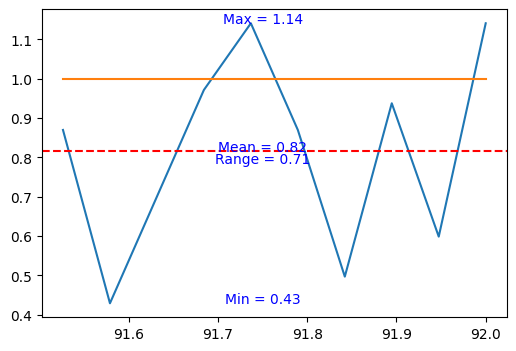

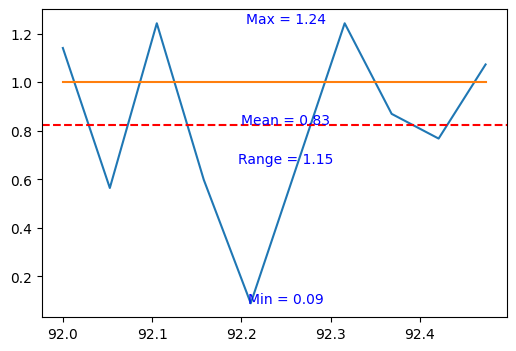

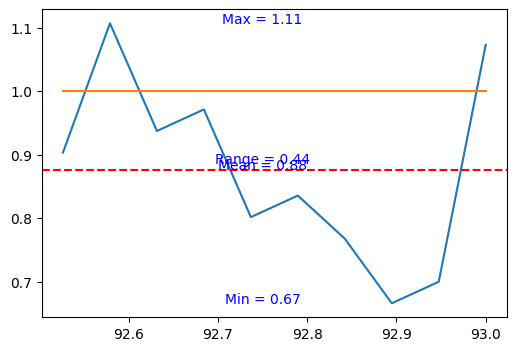

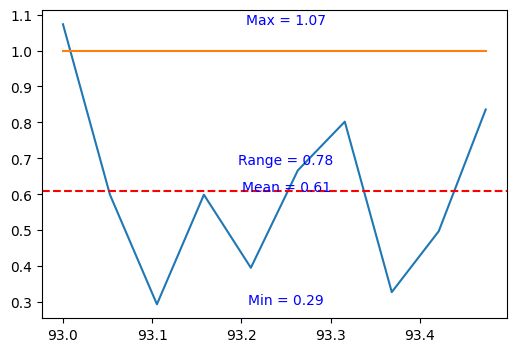

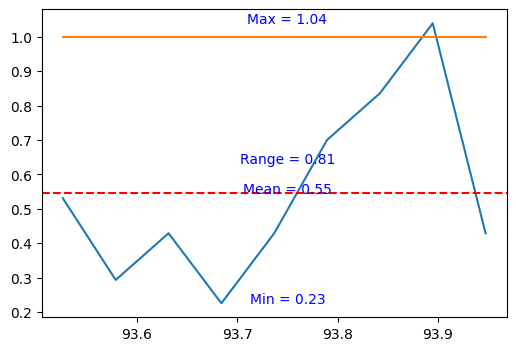

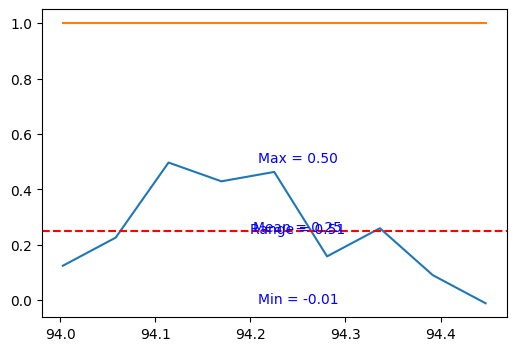

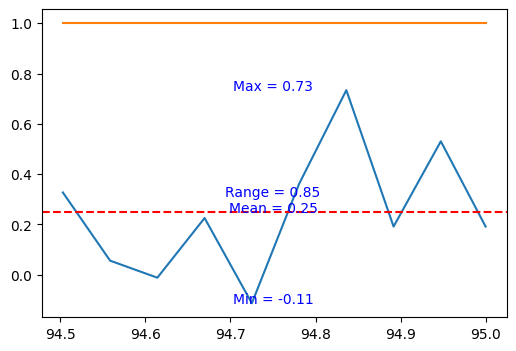

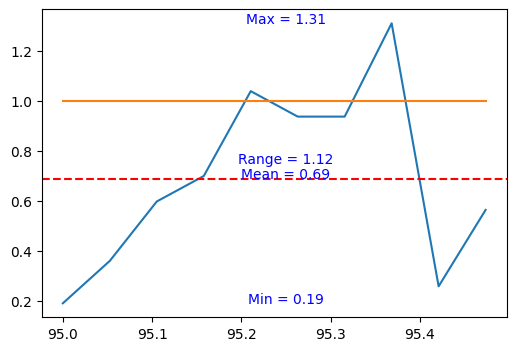

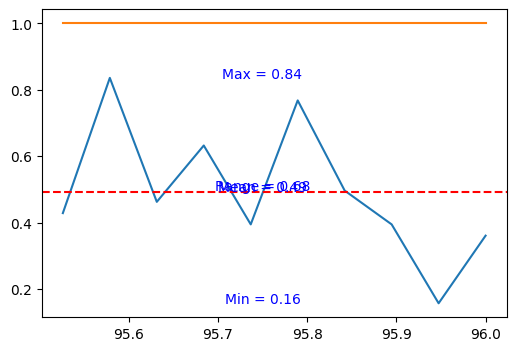

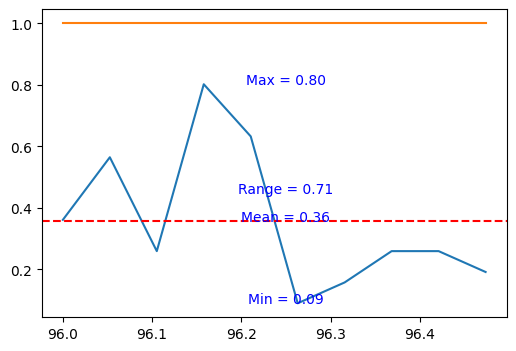

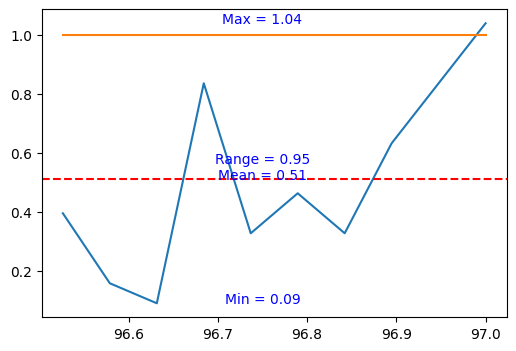

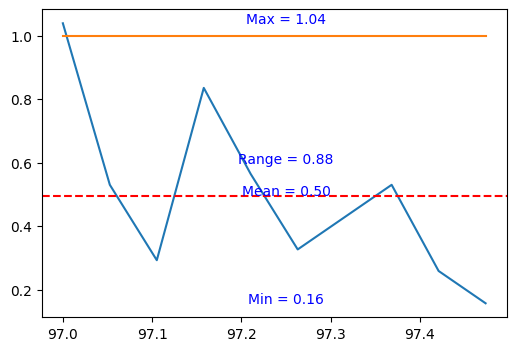

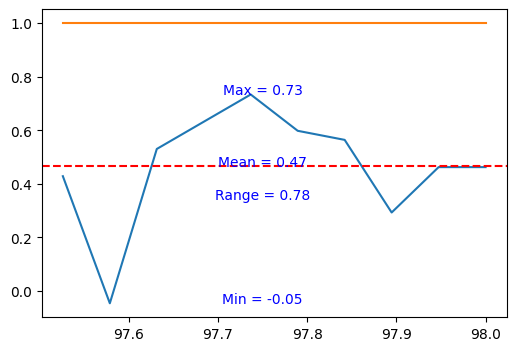

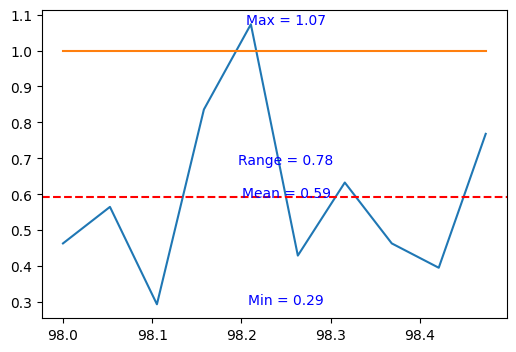

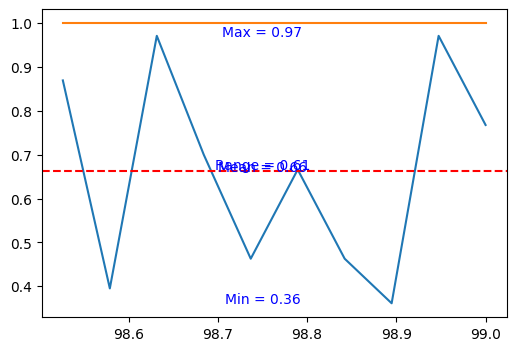

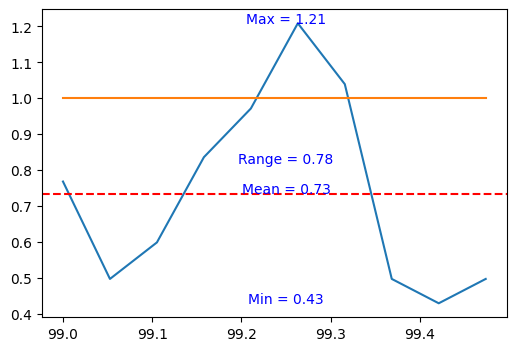

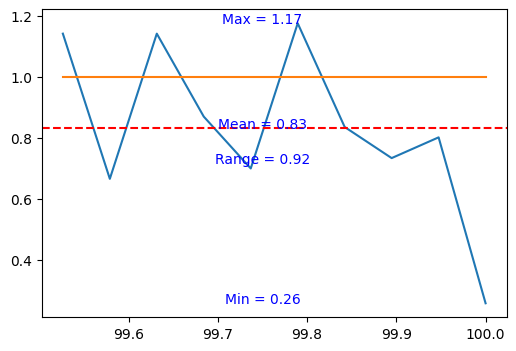

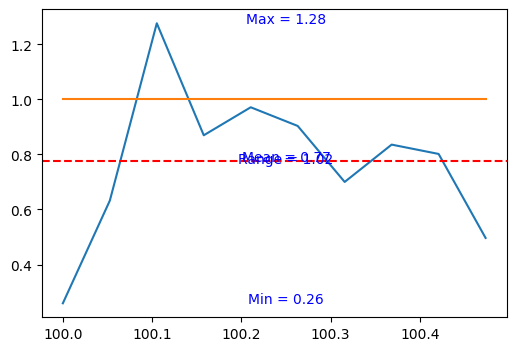

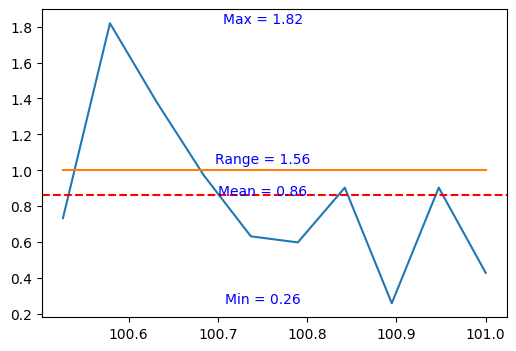

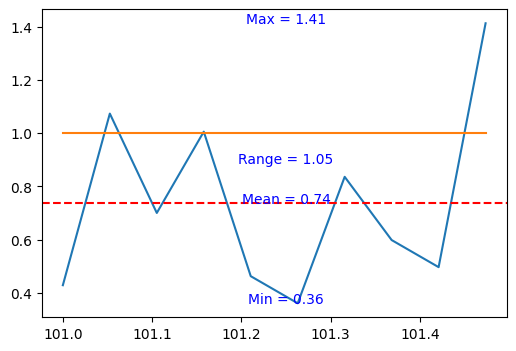

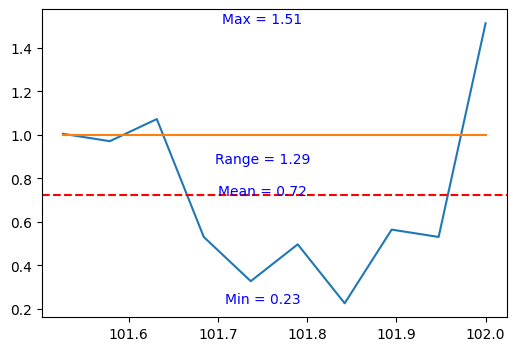

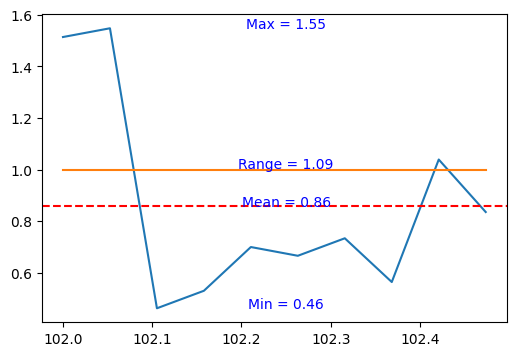

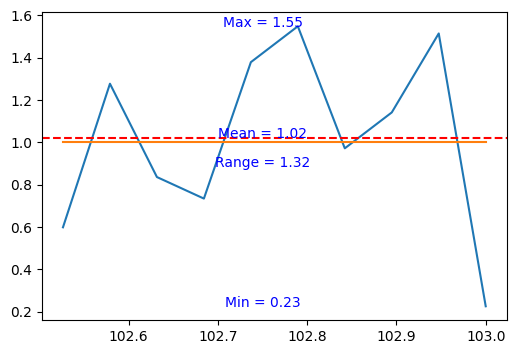

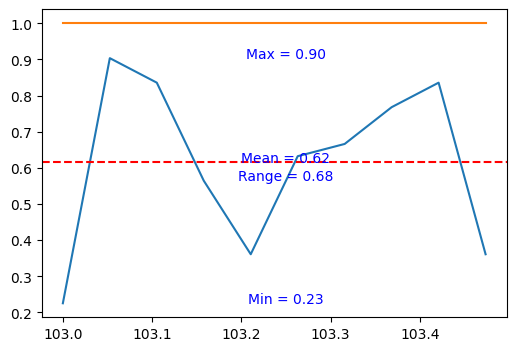

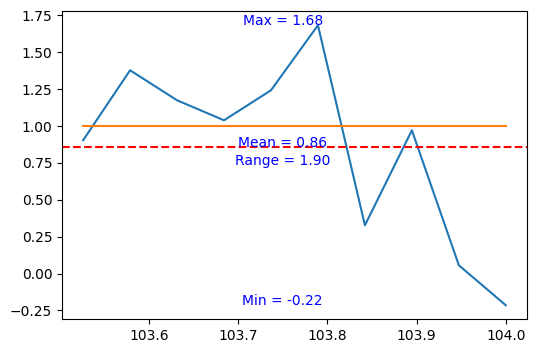

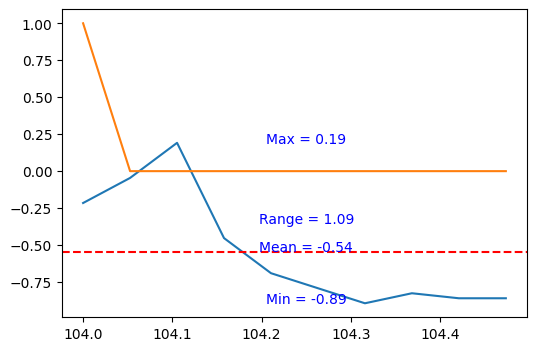

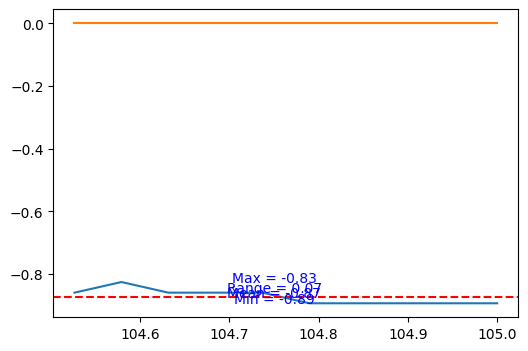

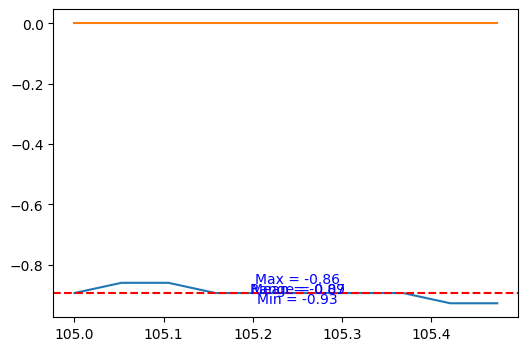

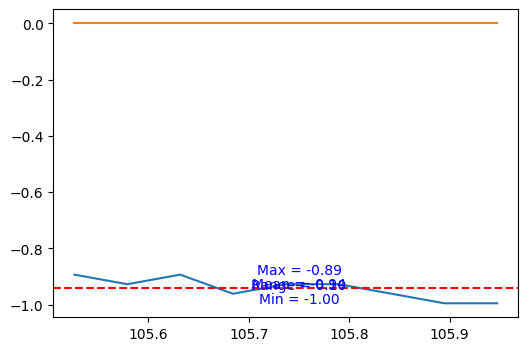

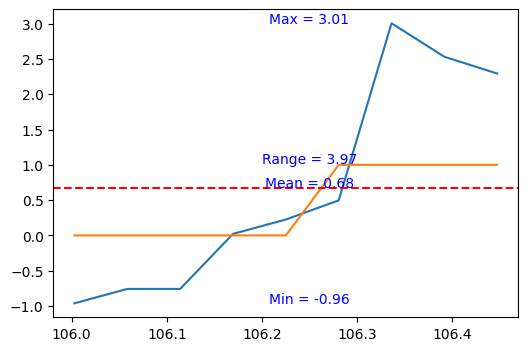

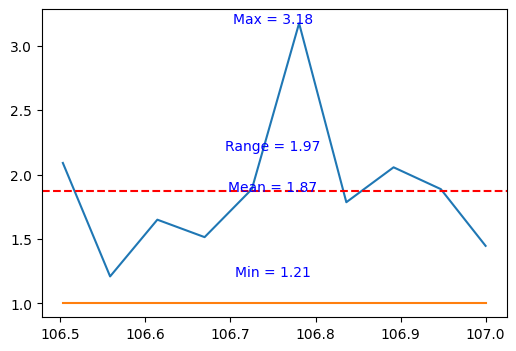

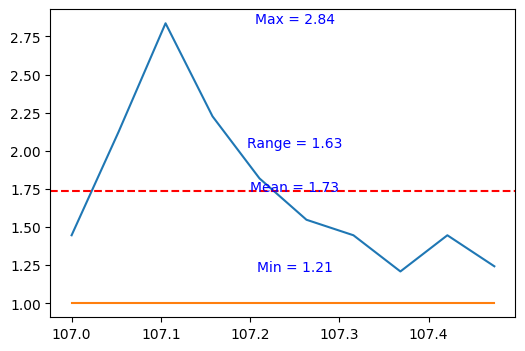

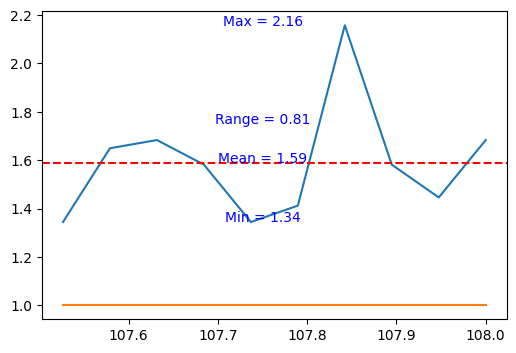

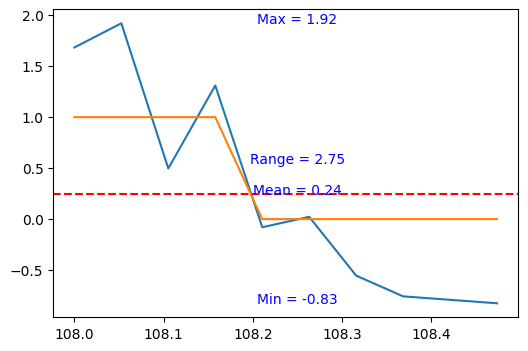

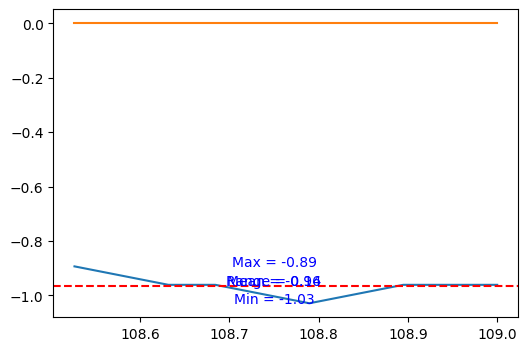

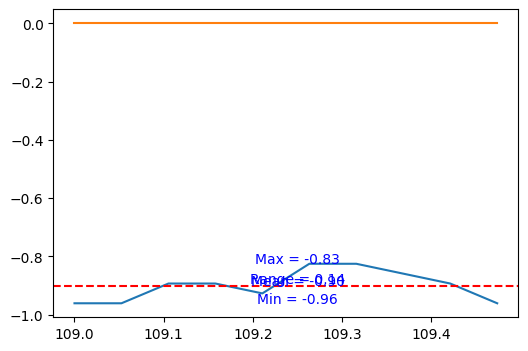

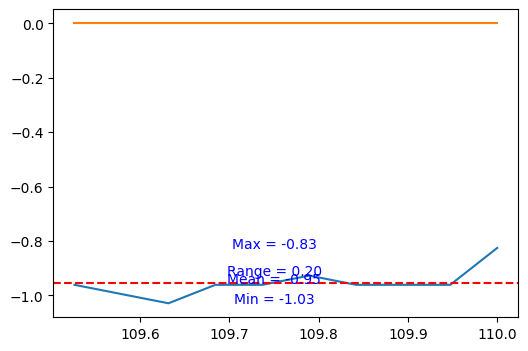

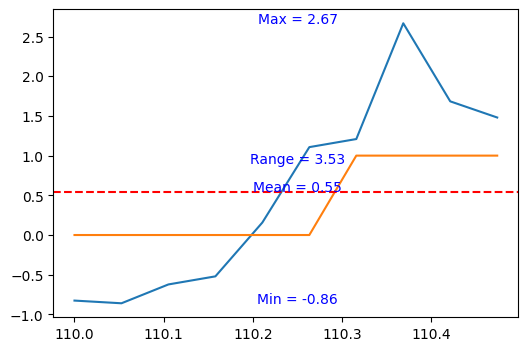

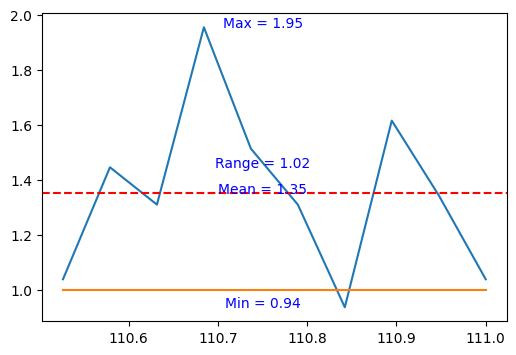

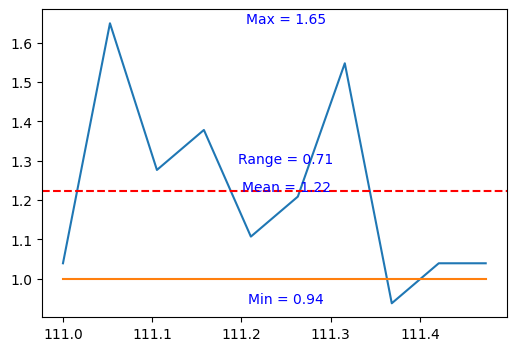

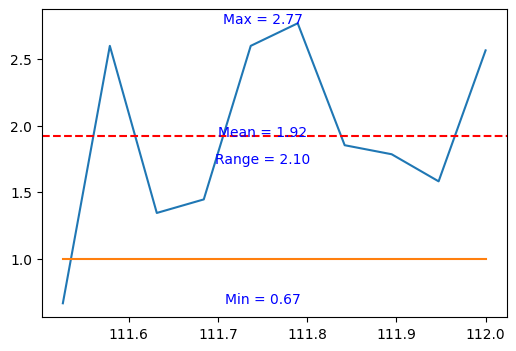

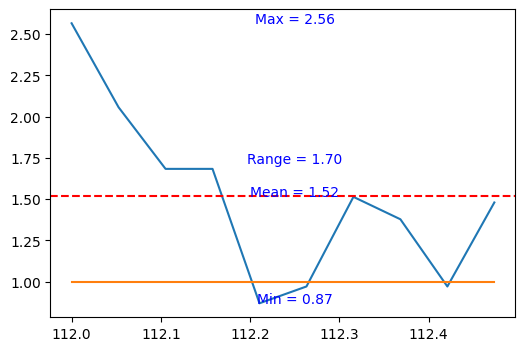

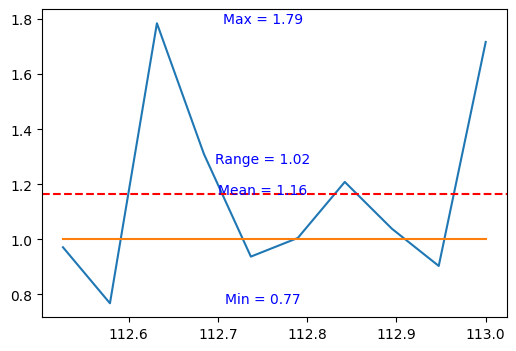

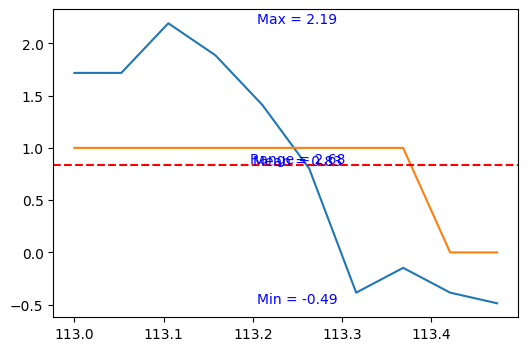

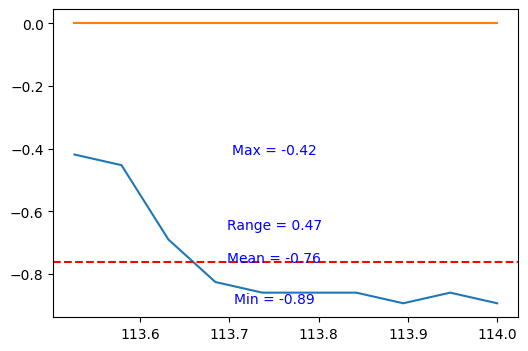

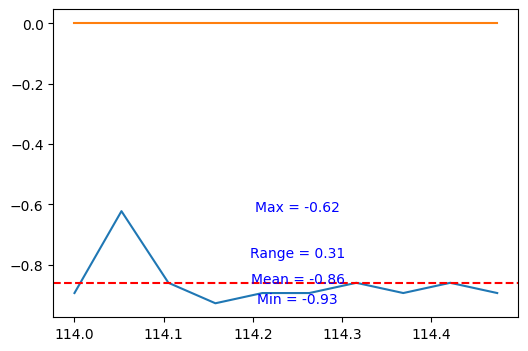

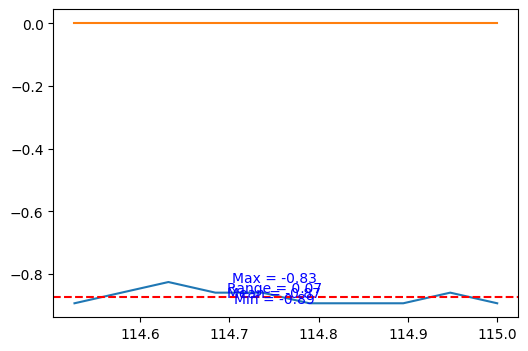

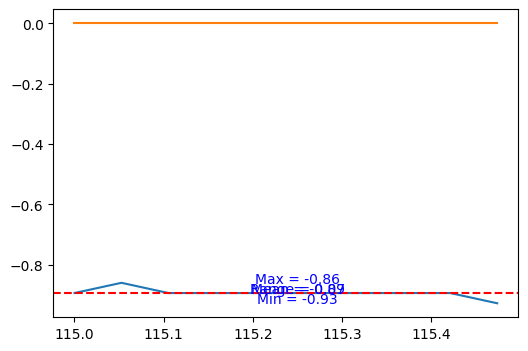

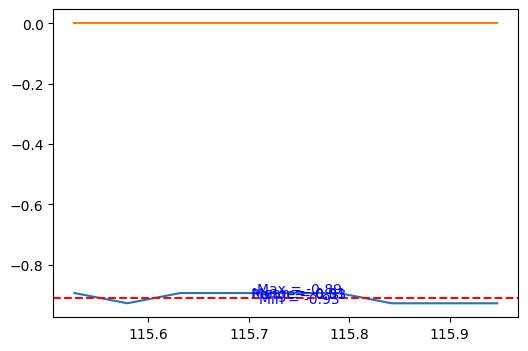

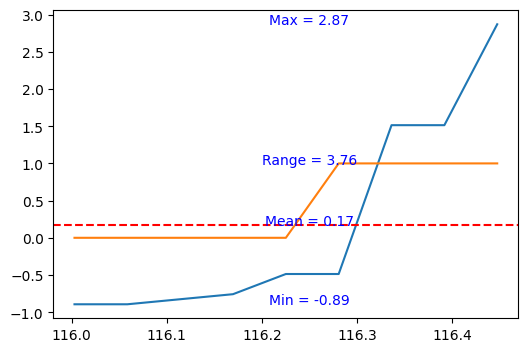

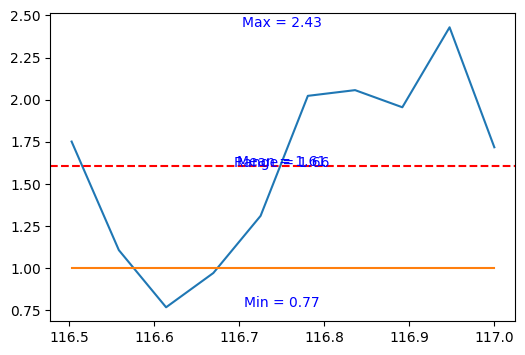

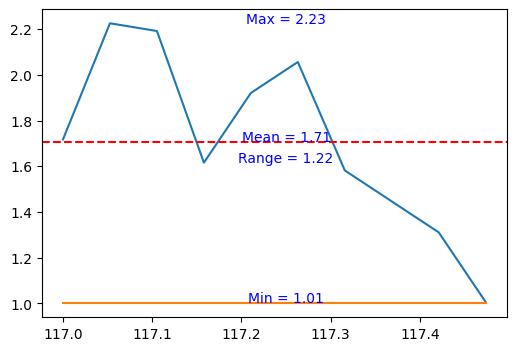

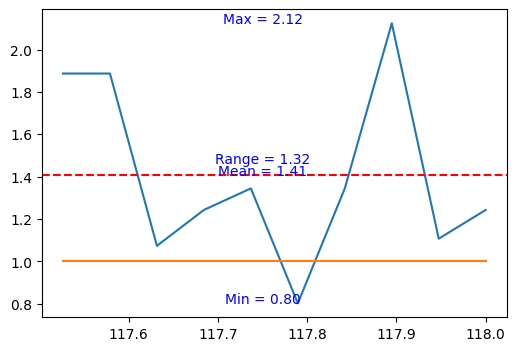

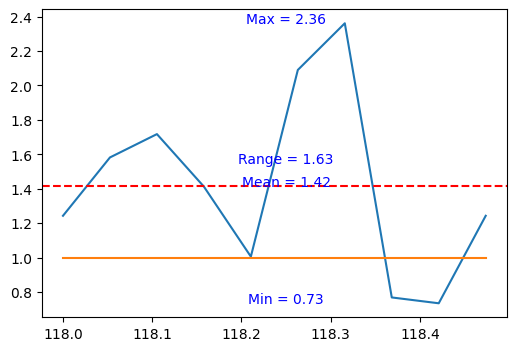

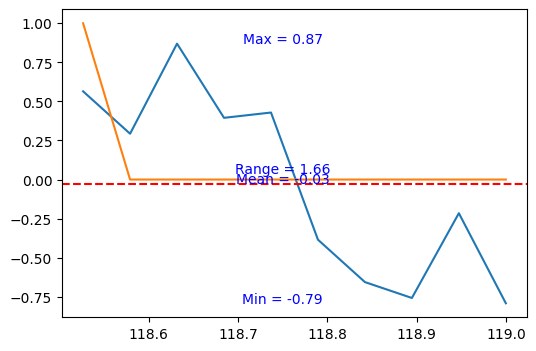

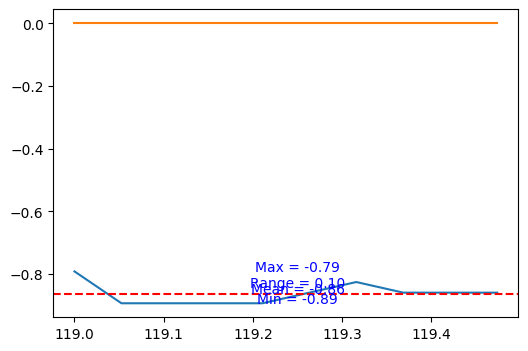

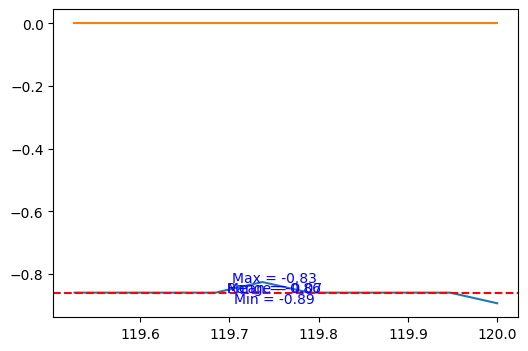

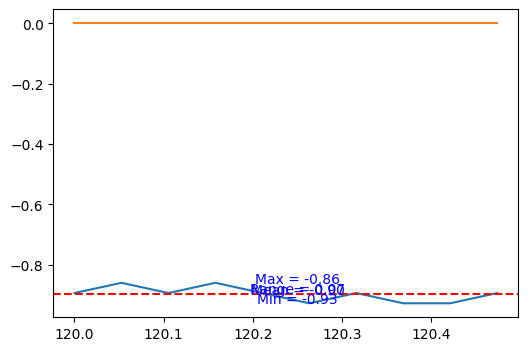

In [41]:
length = 500 #measured in milliseconds

length /= 1000

start_window = 0
end_window = start_window + length

while(end_window < (sum(interval_times))):
    current_frame = cur_interval = df[df["Time"].between(start_window,end_window)]
    
    plt.figure(figsize = (6,4))
    
    mean = current_frame[ "Signal" ].mean()
    max_val = current_frame[ "Signal" ].max() 
    min_val = current_frame[ "Signal" ].min() 
    range_val = max_val - min_val
    
    
    plt.plot(current_frame["Time"], current_frame["Signal"])
    plt.plot(current_frame["Time"], current_frame["State"])
    
    plt.axhline(mean, color='red', linestyle='--', label=f"Mean = {mean:.2f}")
    plt.text((start_window + end_window)/2, mean,  # Position at middle x, mean y
             f"Mean = {mean:.2f}", color='blue', fontsize=10, ha='center')
    
    plt.text((start_window + end_window)/2, max_val,  # Position at middle x, mean y
             f"Max = {max_val:.2f}", color='blue', fontsize=10, ha='center')
    
    plt.text((start_window + end_window)/2, min_val,  # Position at middle x, mean y
             f"Min = {min_val:.2f}", color='blue', fontsize=10, ha='center')
    
    plt.text((start_window + end_window)/2, (min_val+max_val) / 2,  # Position at middle x, mean y
             f"Range = {range_val:.2f}", color='blue', fontsize=10, ha='center')
    
    start_window = end_window
    end_window += length
    
#     end = start + interval_size
#     plt.figure(figsize=(6, 4))  # Create a new figure
#     plt.plot(x[start:end], y[start:end], label=f"Interval {i + 1}")
#     plt.title(f"Plot for Interval {i + 1}")
#     plt.xlabel("X")
#     plt.ylabel("Y")
#     plt.legend()
#     plt.grid(True)
#     plt.show()